### Problem statement 

**Business Understanding**

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

 

`The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:`

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

All other cases: All other cases when the payment is paid on time.

 

 

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

`Approved :` The Company has approved loan Application

`Cancelled :` The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

`Refused :` The company had rejected the loan (because the client does not meet their requirements etc.).

`Unused offer :`  Loan has been cancelled by the client but on different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

 

 

**Business Objectives**

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough).

**This dataset has 3 files as explained below:** 

 

1. `'application_data.csv'`  contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.

 

2. `'previous_application.csv'` contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

 

3. `'columns_description.csv'` is data dictionary which describes the meaning of the variables.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount = True)

import sys
sys.path.append('/content/gdrive/My Drive/Colab Notebooks')

%autosave 1

Mounted at /content/gdrive


Autosaving every 1 seconds


In [2]:
import pandas as pd ,numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#this will help us to expand the size of the data that is going to get displayed
pd.set_option('display.max_rows',12)
pd.set_option('display.max_columns',12)

#warnings will be ignored with the help of this syntax
import warnings
warnings.filterwarnings('ignore')

### columns dictionary

this is the dictionary where we can see the features description

In [3]:
columns_description = pd.read_csv('/content/gdrive/MyDrive/Datasets/upgrad_submission/columns_description.csv', encoding='cp1252' )
columns_description.head()

Unnamed: 0             Table                 Row  \
0           1  application_data          SK_ID_CURR   
1           2  application_data              TARGET   
2           5  application_data  NAME_CONTRACT_TYPE   
3           6  application_data         CODE_GENDER   
4           7  application_data        FLAG_OWN_CAR   

                                         Description Special  
0                           ID of loan in our sample     NaN  
1  Target variable (1 - client with payment diffi...     NaN  
2        Identification if loan is cash or revolving     NaN  
3                               Gender of the client     NaN  
4                      Flag if the client owns a car     NaN

### New applications data 

Let's load the new applications first and see what's there in the data

In [4]:
application_data = pd.read_csv('/content/gdrive/MyDrive/Datasets/upgrad_submission/application_data.csv')
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  ...  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0               Y  ...                         0.0                        0.0   
1               N  ...                         0.0                        0.0   
2               Y  ...                         0.0                        0.0   
3               Y  ...                         NaN                        NaN   
4               Y  ...                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                        1.0  
1                        0.0                        0.0  
2                        0.0                        0.0  
3                        NaN                        NaN  
4                        0.0                        0.0  

[5 rows x 122 columns]

#### Basic information about the data 

In [5]:
print(f"for the new applications we have {application_data.shape[0]} datapoints and {application_data.shape[1]} features")

for the new applications we have 307511 datapoints and 122 features


In [6]:
#getting the information about the each of the columns 
application_data.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [7]:
#this will help us to take a look at the count,mean ,std deviation,min ,max and the interquartile range of the data 
application_data.describe().T

count           mean            std       min  \
SK_ID_CURR                  307511.0  278180.518577  102790.175348  100002.0   
TARGET                      307511.0       0.080729       0.272419       0.0   
CNT_CHILDREN                307511.0       0.417052       0.722121       0.0   
AMT_INCOME_TOTAL            307511.0  168797.919297  237123.146279   25650.0   
AMT_CREDIT                  307511.0  599025.999706  402490.776996   45000.0   
...                              ...            ...            ...       ...   
AMT_REQ_CREDIT_BUREAU_DAY   265992.0       0.007000       0.110757       0.0   
AMT_REQ_CREDIT_BUREAU_WEEK  265992.0       0.034362       0.204685       0.0   
AMT_REQ_CREDIT_BUREAU_MON   265992.0       0.267395       0.916002       0.0   
AMT_REQ_CREDIT_BUREAU_QRT   265992.0       0.265474       0.794056       0.0   
AMT_REQ_CREDIT_BUREAU_YEAR  265992.0       1.899974       1.869295       0.0   

                                 25%       50%       75%          max  
SK_ID_CURR                  189145.5  278202.0  367142.5     456255.0  
TARGET                           0.0       0.0       0.0          1.0  
CNT_CHILDREN                     0.0       0.0       1.0         19.0  
AMT_INCOME_TOTAL            112500.0  147150.0  202500.0  117000000.0  
AMT_CREDIT                  270000.0  513531.0  808650.0    4050000.0  
...                              ...       ...       ...          ...  
AMT_REQ_CREDIT_BUREAU_DAY        0.0       0.0       0.0          9.0  
AMT_REQ_CREDIT_BUREAU_WEEK       0.0       0.0       0.0          8.0  
AMT_REQ_CREDIT_BUREAU_MON        0.0       0.0       0.0         27.0  
AMT_REQ_CREDIT_BUREAU_QRT        0.0       0.0       0.0        261.0  
AMT_REQ_CREDIT_BUREAU_YEAR       0.0       1.0       3.0         25.0  

[106 rows x 8 columns]

We can observe that there might have some outliers in the data 

#### Missing value analysis

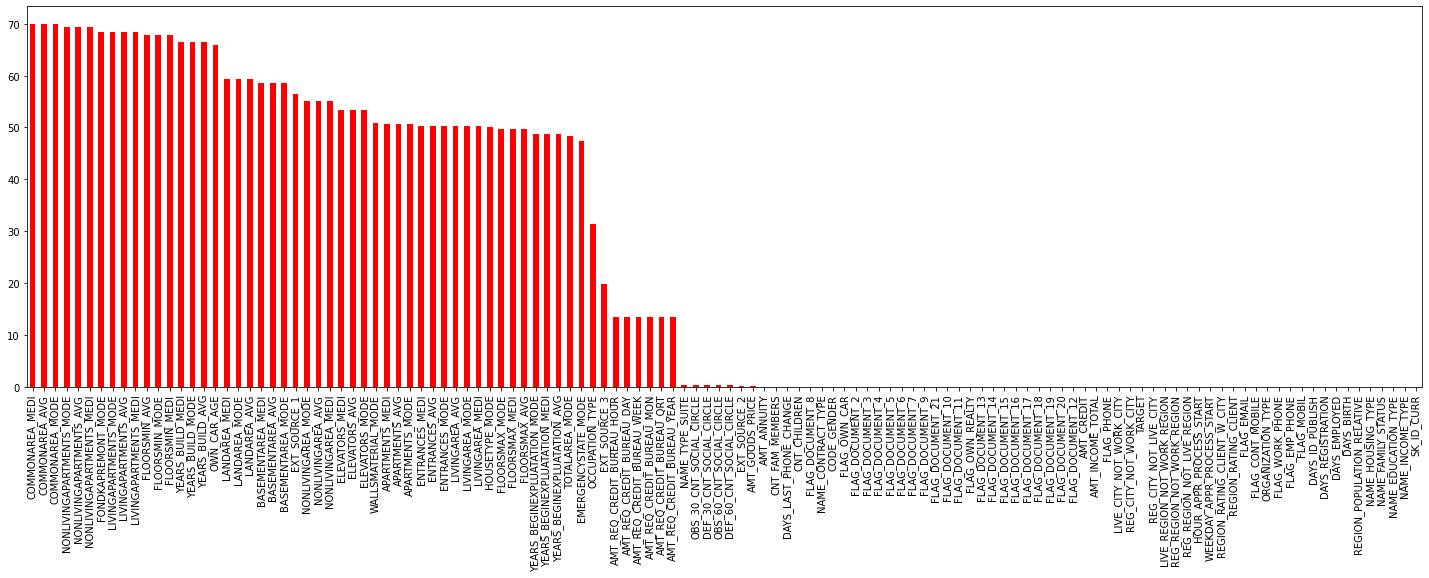

In [8]:
((application_data.isna().mean().sort_values(ascending=False))*100).plot(kind='bar',figsize=(25,7),color='red')
plt.show()

We have multiple features which having missing value greater than 50 
this 50 will be our decisive factor we have selected for the analysis so that we have good result 

so let's drop those features

In [9]:
df = application_data.loc[:, application_data.isnull().mean() < .50]
print(f"after dropping the features we have {df.shape[0]} datapoints and {df.shape[1]} features")

after dropping the features we have 307511 datapoints and 81 features


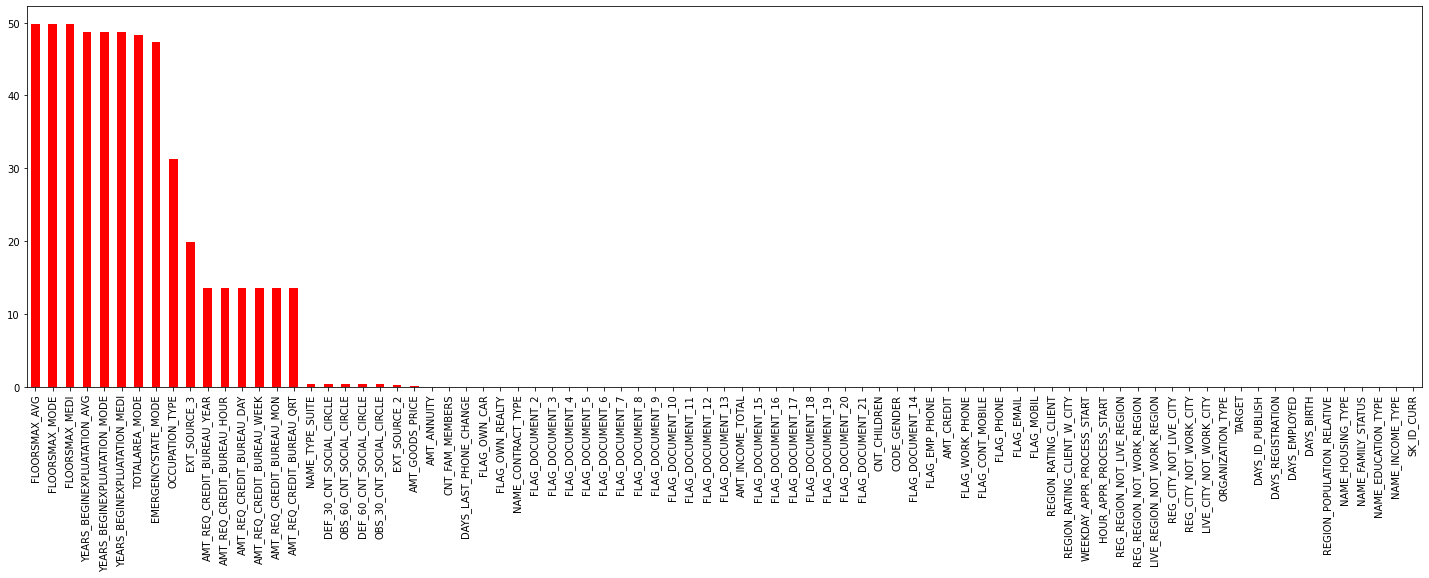

In [10]:
((df.isna().mean().sort_values(ascending=False))*100).plot(kind='bar',figsize=(25,7),color='red')
plt.show()

now, we are not considering the data which is missing more than 10 percent as if we use that for the further analysis it might affect our hypothesis


In [11]:
df = application_data.loc[:, application_data.isnull().mean() < .10]
print(f"after dropping the features we have {df.shape[0]} datapoints and {df.shape[1]} features")

after dropping the features we have 307511 datapoints and 65 features


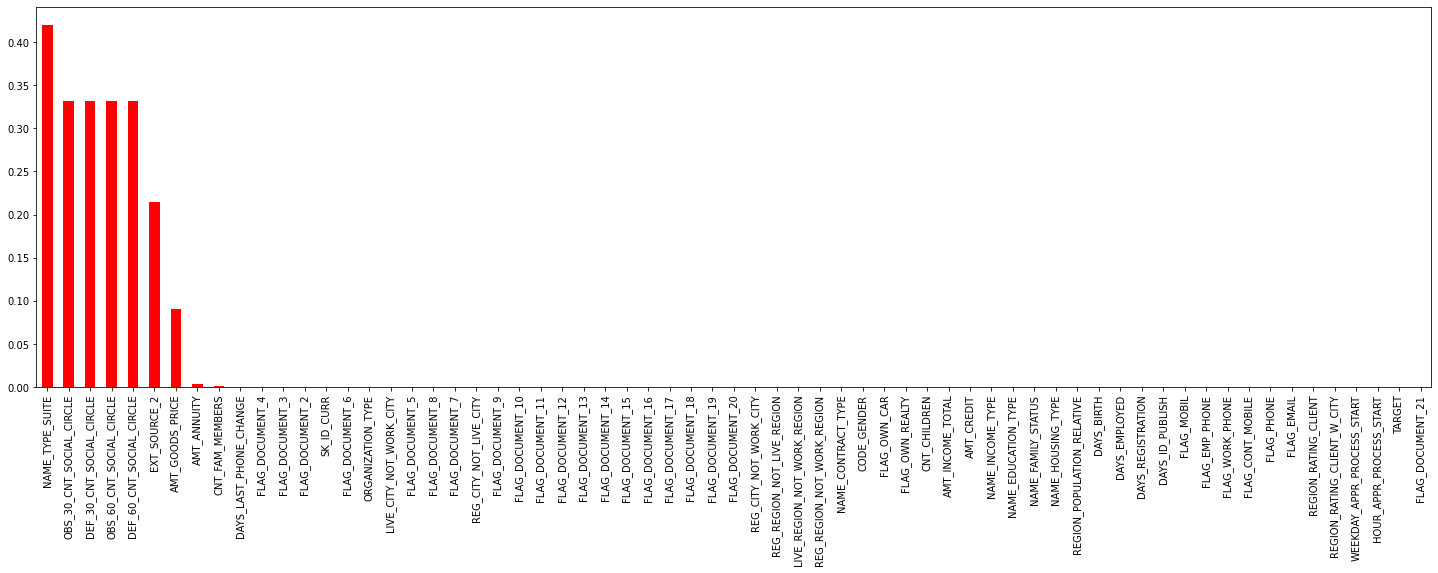

In [12]:
((df.isna().mean().sort_values(ascending=False))*100).plot(kind='bar',figsize=(25,7),color='red')
plt.show()

we have now good data for the further analysis

In [13]:
#This are the columns that have missing values 
(df.isna().mean().sort_values(ascending=False)>0).sum()

10

to deal with the missing values we are going to replace the datatypes which are object with the mode and the datatypes which are int or float with its mean,median and mode 

the below functions checks that after replacing the value with the respective method how much it affects the data based on its mean median and mode 

after that it selects the best method so that the deflection must be very low or negligible 

in the end it provide the absolute difference between the orignal data and the data after replacing the value 

this function boosts up the analysis procedure 

In [14]:
def nan_checking(col_name):
   
    if col_name.dtype=='object':
        
        col_name.fillna(col_name.mode()[0],inplace=True)
        print('missing values filled with mode')
        return(f"because for {col_name.name} mode is the best method to fill but there is no abs difference as the dtype is object\n")

    else:
        addition_org=[col_name.mean(),col_name.median(),col_name.mode()[0]]
       
        org_sum = sum(addition_org)
       
        addition_mean=[col_name.fillna(col_name.mean()).mean(),col_name.fillna(col_name.mean()).median(),col_name.fillna(col_name.mean()).mode()[0]]

        mean_sum = sum(addition_mean)

        addition_median=[col_name.fillna(col_name.median()).mean(),col_name.fillna(col_name.median()).median(),col_name.fillna(col_name.median()).mode()[0]]

        median_sum = sum(addition_median)
  
        addition_mode=[col_name.fillna(col_name.mode()[0]).mean(),col_name.fillna(col_name.mode()[0]).median(),col_name.fillna(col_name.mode()[0]).mode()[0]]

        mode_sum = sum(addition_mode)

        dic={"mean"  : abs(org_sum-mean_sum),
            "median" : abs(org_sum-median_sum),
            "mode"  : abs(org_sum-mode_sum)}
       
        if min(dic,key=dic.get) == 'mean':
            col_name.fillna(col_name.mean(),inplace=True)
            print('missing values filled with mean')
        elif min(dic,key=dic.get) == 'median':
            col_name.fillna(col_name.median(),inplace=True)
            print('missing values filled with median')
        else :
            col_name.fillna(col_name.mode()[0],inplace=True)
            print('missing values filled with mode')
     
        return(f"because for {col_name.name} {min(dic,key=dic.get)} is the best value to fill and the absolute difference is {dic[min(dic,key=dic.get)]}\n")

In [15]:
list_of_null_columns=[]

for k,v in (df.isna().mean().sort_values(ascending=False)>0)[:(df.isna().mean().sort_values(ascending=False)>0).sum()].items():
    list_of_null_columns.append(k)

for x in list_of_null_columns:
    print(f"{nan_checking(df[x])}")

missing values filled with mode
because for NAME_TYPE_SUITE mode is the best method to fill but there is no abs difference as the dtype is object

missing values filled with mean
because for OBS_30_CNT_SOCIAL_CIRCLE mean is the best value to fill and the absolute difference is 3.175237850427948e-14

missing values filled with mean
because for DEF_30_CNT_SOCIAL_CIRCLE mean is the best value to fill and the absolute difference is 2.3869795029440866e-15

missing values filled with mean
because for OBS_60_CNT_SOCIAL_CIRCLE mean is the best value to fill and the absolute difference is 2.7755575615628914e-14

missing values filled with mean
because for DEF_60_CNT_SOCIAL_CIRCLE mean is the best value to fill and the absolute difference is 2.1788126858268697e-15

missing values filled with median
because for EXT_SOURCE_2 median is the best value to fill and the absolute difference is 0.00011068019119808703

missing values filled with mean
because for AMT_GOODS_PRICE mean is the best value to f

In [16]:
(df.isna().mean().sort_values(ascending=False)>0).sum()

0

As we can see that the data is now not empty we have successfully worked on the missing data 

#### Data cleaning  

In [17]:
#checking the data 
import random
df.iloc[random.randint(0,len(df))]

SK_ID_CURR                106305
TARGET                         0
NAME_CONTRACT_TYPE    Cash loans
CODE_GENDER                    M
FLAG_OWN_CAR                   N
                         ...    
FLAG_DOCUMENT_17               0
FLAG_DOCUMENT_18               0
FLAG_DOCUMENT_19               0
FLAG_DOCUMENT_20               0
FLAG_DOCUMENT_21               0
Name: 5387, Length: 65, dtype: object

In [18]:
#This is the description of the important target variables we are going to look forward for 
for x in df.columns.to_list(): 
  print(f"{x} : {columns_description.iloc[columns_description[columns_description['Row']==x].index[0]].Description}\n")

SK_ID_CURR : ID of loan in our sample

TARGET : Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)

NAME_CONTRACT_TYPE : Identification if loan is cash or revolving

CODE_GENDER : Gender of the client

FLAG_OWN_CAR : Flag if the client owns a car

FLAG_OWN_REALTY : Flag if client owns a house or flat

CNT_CHILDREN : Number of children the client has

AMT_INCOME_TOTAL : Income of the client

AMT_CREDIT : Credit amount of the loan

AMT_ANNUITY : Loan annuity

AMT_GOODS_PRICE : For consumer loans it is the price of the goods for which the loan is given

NAME_TYPE_SUITE : Who was accompanying client when he was applying for the loan

NAME_INCOME_TYPE : Clients income type (businessman, working, maternity leave,…)

NAME_EDUCATION_TYPE : Level of highest education the client achieved

NAME_FAMILY_STATUS : Family status of the client

NAME_HOUSING_TYPE : Wha

we have some columns which are inappropreate so we need to work on that 

we are going to replace days with the years 

In [19]:
#converting days to years 
data_cleaning=["DAYS_BIRTH","DAYS_EMPLOYED" ,"DAYS_REGISTRATION" ,"DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE"]

for x in data_cleaning:
  df[x]=df[x].abs()/365

#renaming the respective columns
df.rename({"DAYS_BIRTH":"YEARS_BIRTH",
            "DAYS_EMPLOYED":"YEARS_EMPLOYED" ,
            "DAYS_REGISTRATION" :"YEARS_REGISTRATION",
            "DAYS_ID_PUBLISH":"YEARS_ID_PUBLISH", 
            "DAYS_LAST_PHONE_CHANGE":"YEARS_LAST_PHONE_CHANGE"},axis=1,inplace=True)

#### Distribution of data

In [20]:
from google.colab import files

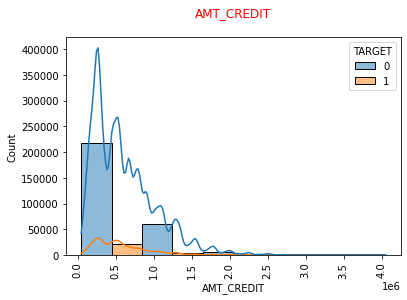

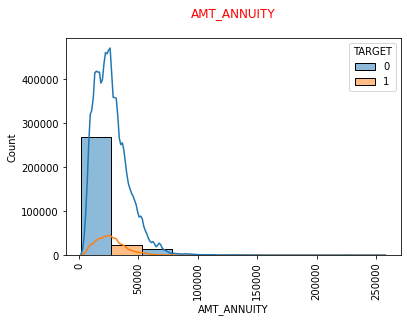

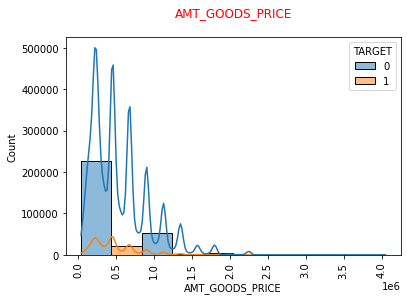

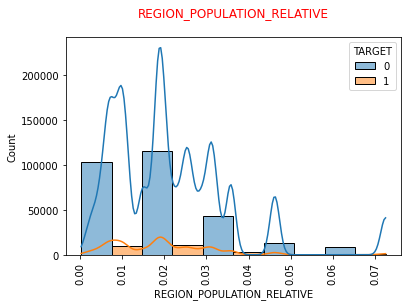

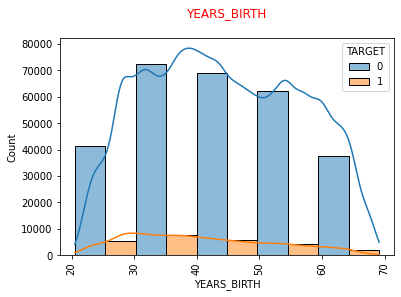

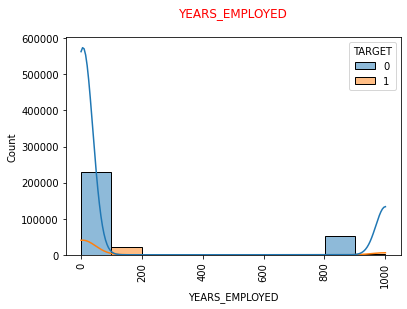

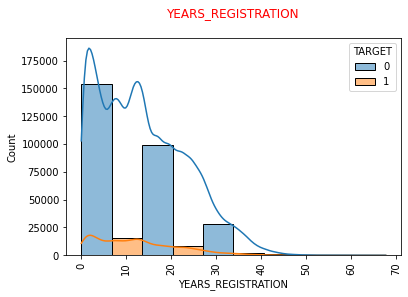

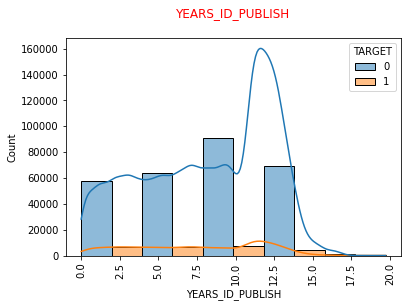

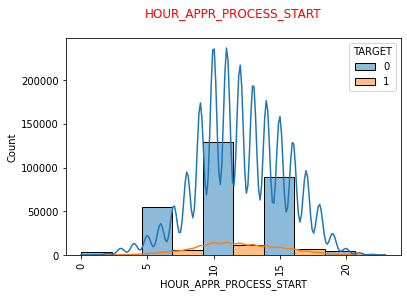

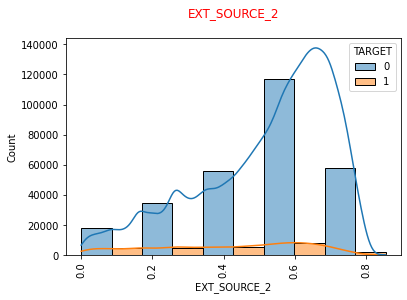

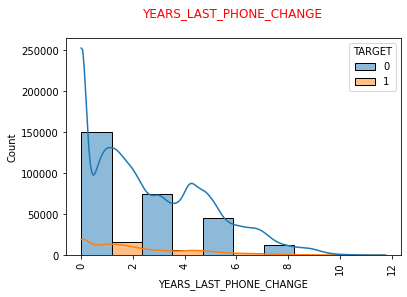

In [21]:
mul = ["AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE",
"REGION_POPULATION_RELATIVE",
"YEARS_BIRTH","YEARS_EMPLOYED","YEARS_REGISTRATION","YEARS_ID_PUBLISH",
"HOUR_APPR_PROCESS_START",
"EXT_SOURCE_2",
"YEARS_LAST_PHONE_CHANGE"]

for s in mul:
  sns.histplot(data=df, x=s,hue='TARGET',multiple="dodge",kde=True,bins=5)
  plt.title(f"{s}\n",color='red')
  plt.xticks(rotation=90)
  #plt.savefig(f'{s}.png',vmax='I', vmin='I', hmax='I', hmin='I',bbox_inches='tight',quality=100, optimize=True,progressive=True,pad_inches=.2)
  plt.show()
  #files.download(f'/content/{s}.png')
  print()

**few notable points**

- many people have credit amount of the loan between 0 to .5 le6
- majority people with all other cases have loan annularity between 0 - 50000
- For the people with other cases mostly consumer loans the price of the goods for which the loan is given range between 0-0.5 le6
- mostly people who are applying for the loan are coming from minority region  
- majority of the people who are applying for the loan have age range between 30 - 50 years while people who are at the age 30  - 35 tends to apply more for the loan 
- as we can notice that we do have outliers in the years employed data 
- people with difficulties have changed their registration 0-30 years before 
- application client those who change the identity document between 7-10 years ago are more with facing difficulties 
- majority of the application process started 10-15 hrs of the working period
- people who are applying for the loan has Normalized score mostly ranging between .5 -.8 
- majority public have changed their phone numbers recently that is before 1 or 2 years

#### Correlation

creating the copy of the data and then going to do encoding so that we will get the correlations of categorical features as well 

In [22]:
df_copy = df.copy(deep=True)

In [23]:
encode=[]
for obj in df_copy.columns:
    if df_copy[obj].dtypes == 'object':
        encode.append(obj)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for en in encode:
    df_copy[en]=le.fit_transform(df_copy[en])

checking if we have succesfully encoded the objects 

In [24]:
df_copy.dtypes is not 'object'

True

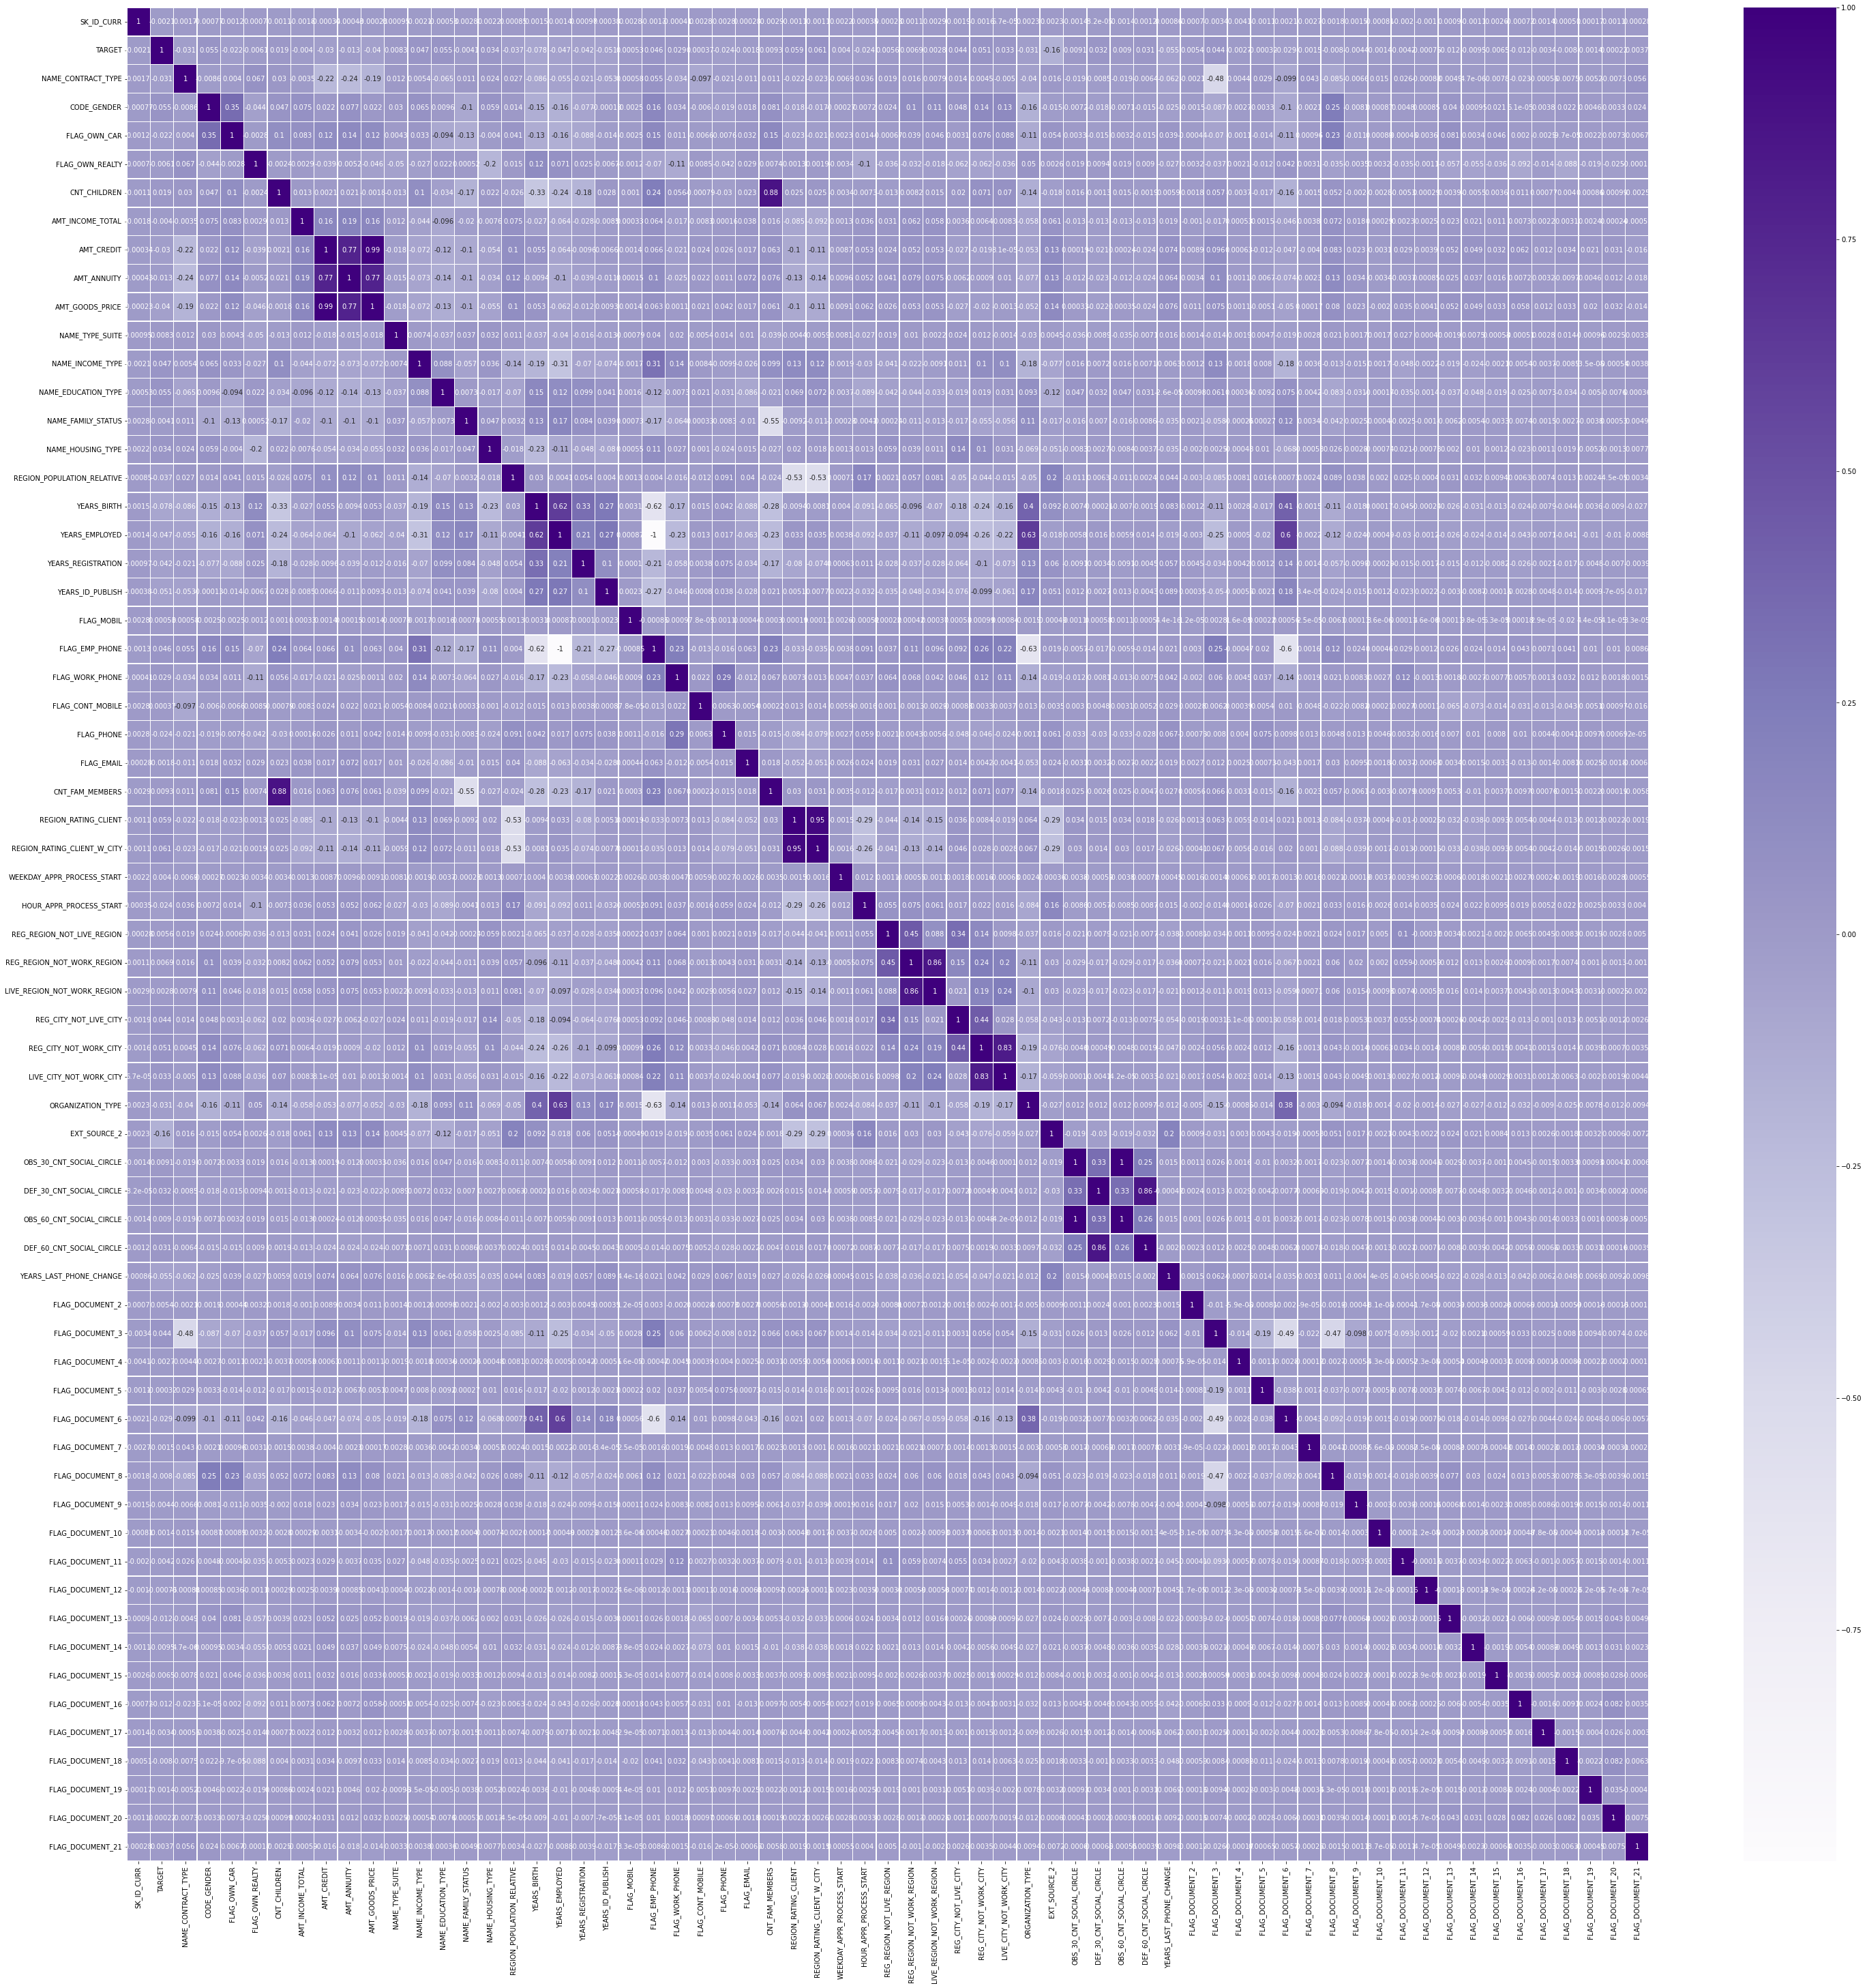

In [25]:
plt.figure(figsize=[50,50])
sns.heatmap(df_copy.corr(),linewidths=.5,cmap="Purples",annot=True)
plt.show()

correlation with the target variable

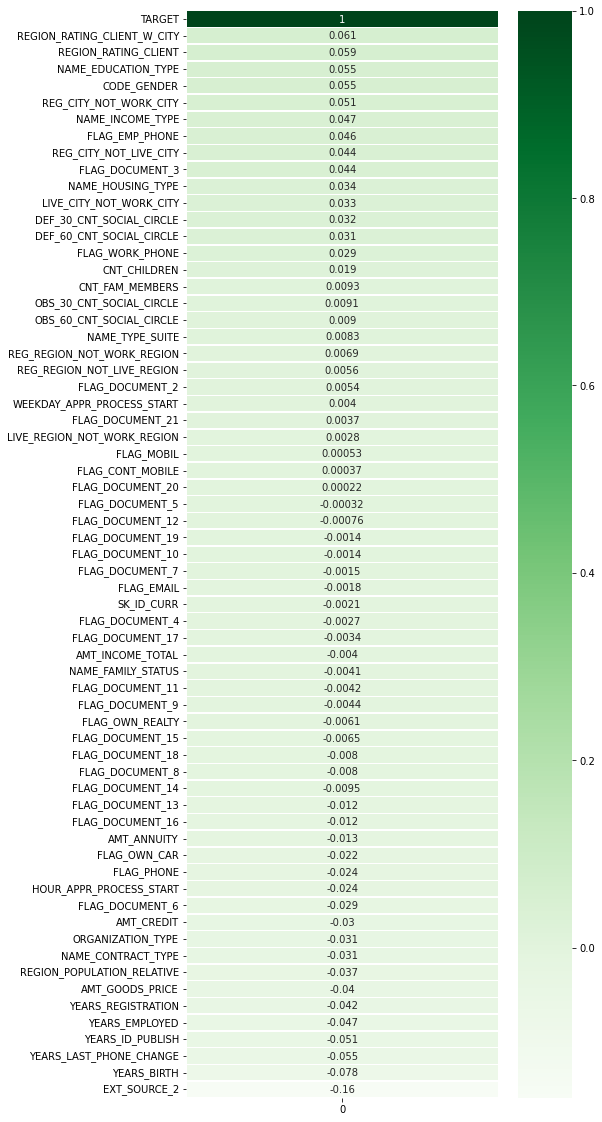

In [26]:
plt.figure(figsize=[7,20])
sns.heatmap(pd.DataFrame(df_copy.corrwith(df_copy["TARGET"]).sort_values(ascending=False)),linewidths=.5,cmap="Greens",annot=True)
plt.show()

here we have positive as well as negative correlation with respect to the target variable 

a positive correlation between variable a and b means that as a changes positively  b also changes positively 

while variables with negative correlation follows the inversion law 
they are opposite to change with each other

In [27]:
#this are the top 10 features that are correlated with the target variable 
pd.DataFrame(df_copy.corrwith(df_copy["TARGET"]).sort_values(ascending=False)).index[1:11].to_list()

['REGION_RATING_CLIENT_W_CITY',
 'REGION_RATING_CLIENT',
 'NAME_EDUCATION_TYPE',
 'CODE_GENDER',
 'REG_CITY_NOT_WORK_CITY',
 'NAME_INCOME_TYPE',
 'FLAG_EMP_PHONE',
 'REG_CITY_NOT_LIVE_CITY',
 'FLAG_DOCUMENT_3',
 'NAME_HOUSING_TYPE']

#### Categorical features 

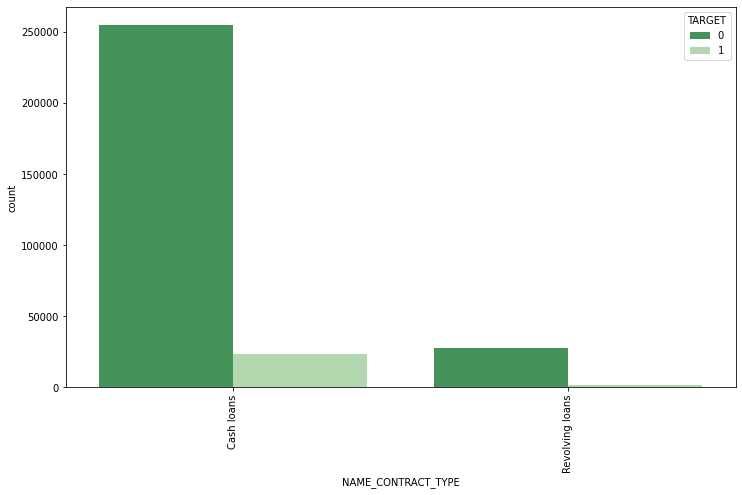

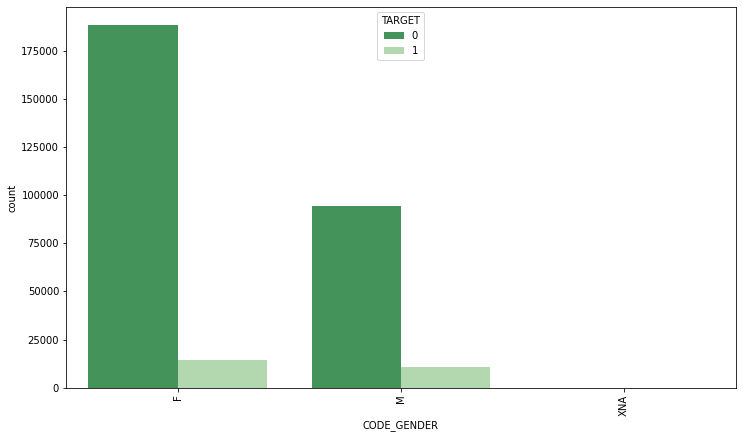

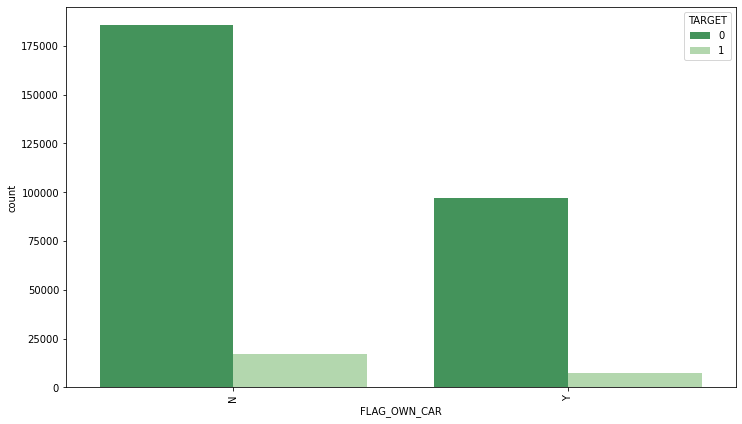

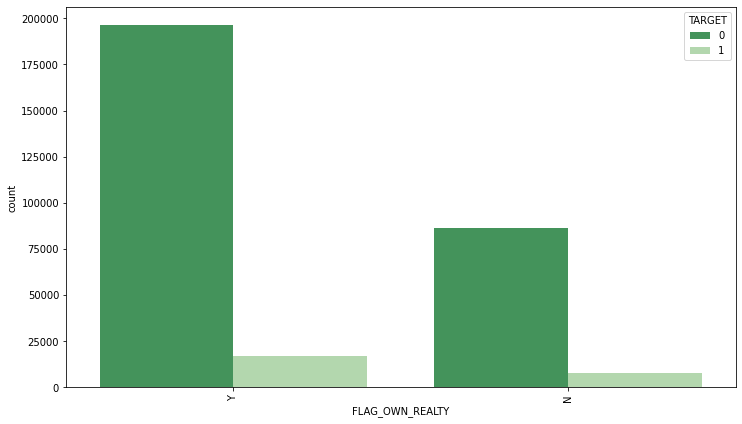

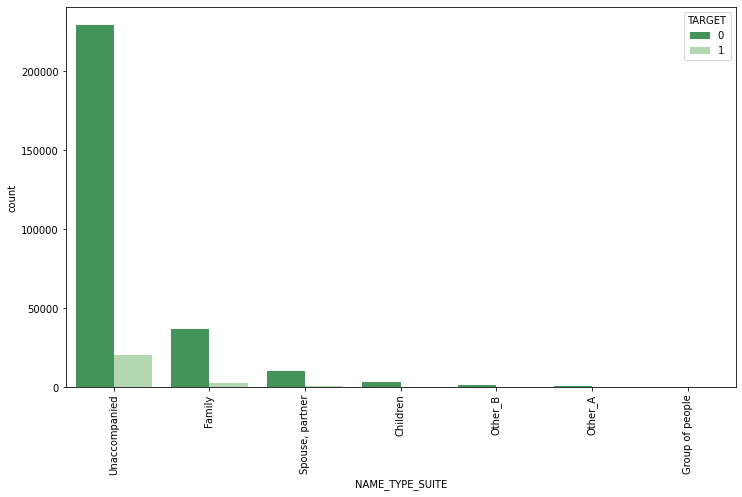

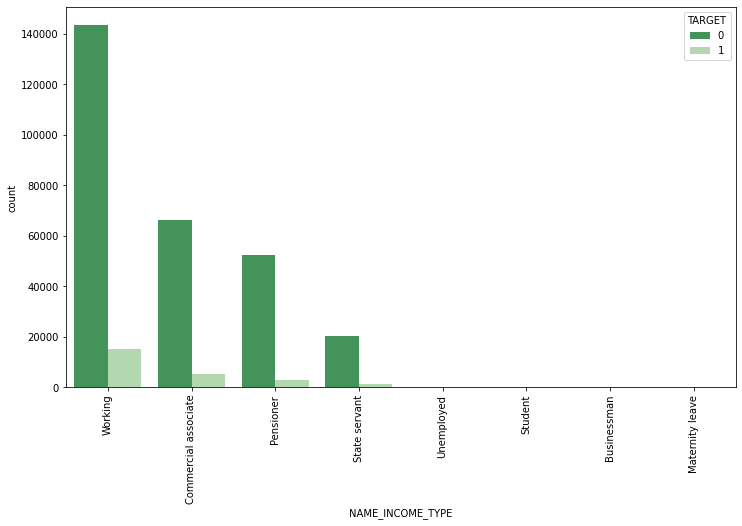

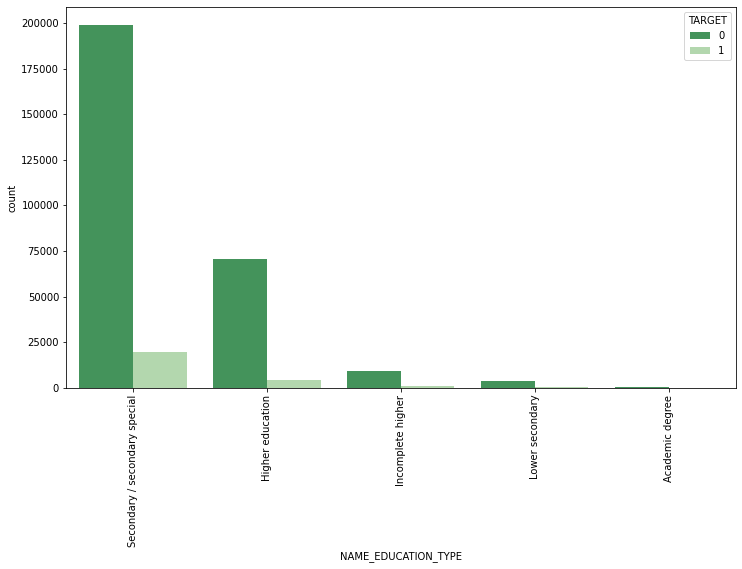

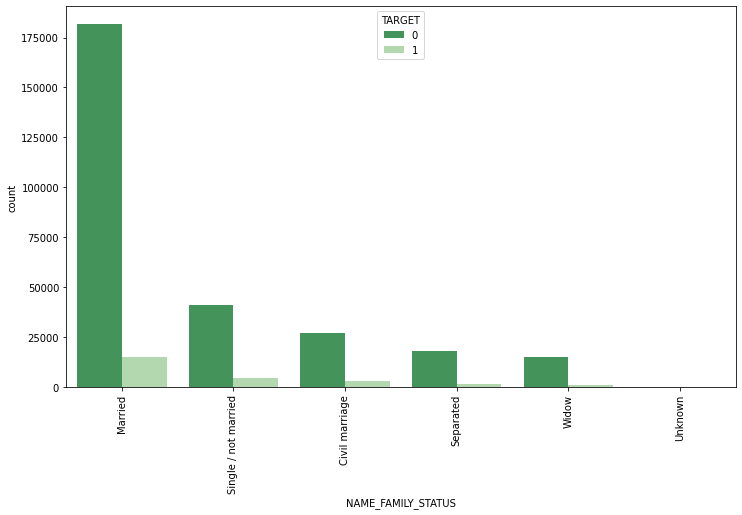

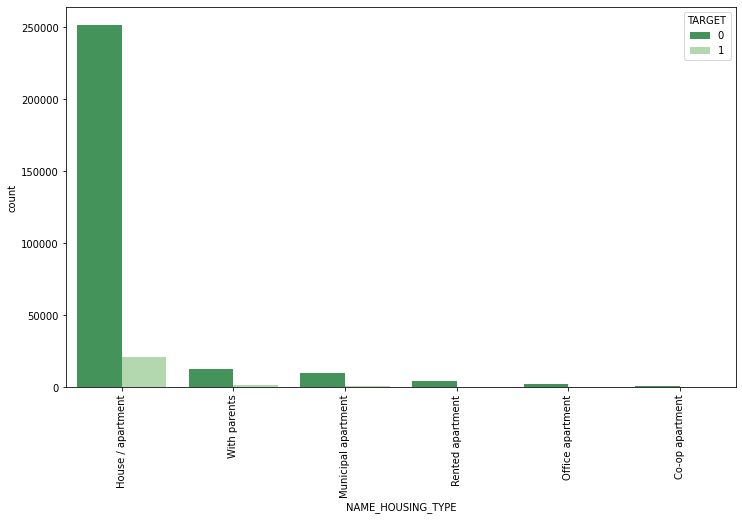

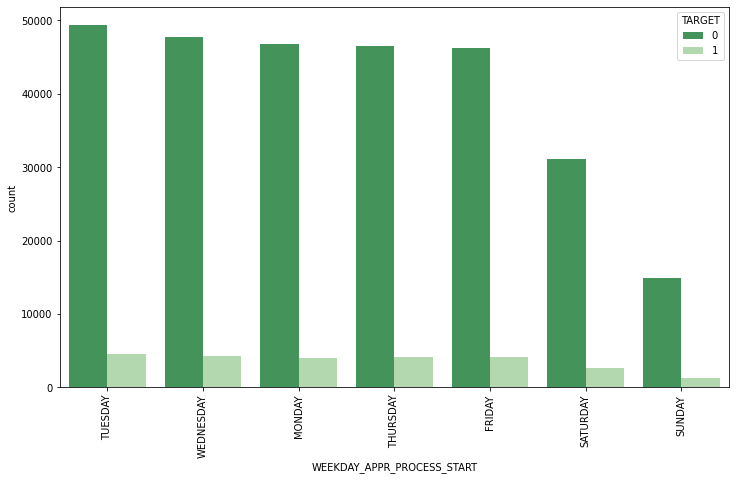

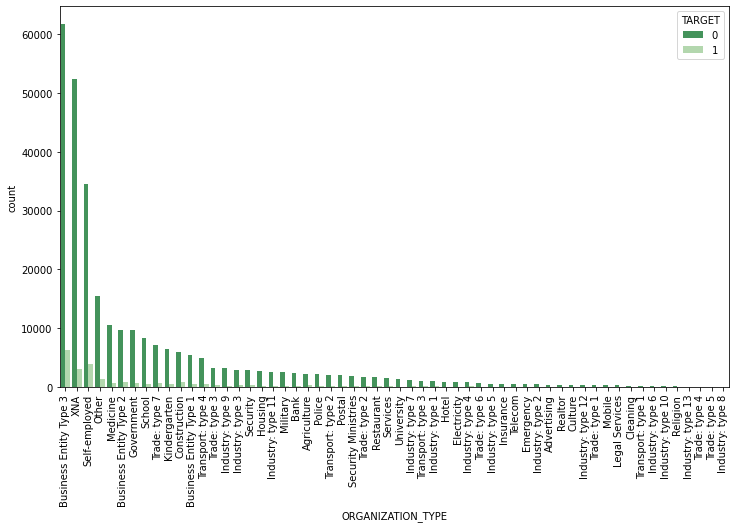

In [28]:
for x in df.columns.to_list():
  if df[x].dtype == 'object':
    plt.figure(figsize=(12,7)) #length x height 
    sns.countplot(df[x],palette="Greens_r",order=df[x].value_counts().index.to_list(),hue=df['TARGET'])
    plt.xticks(rotation=90)
    #plt.savefig(f'{x}.png',vmax='I', vmin='I', hmax='I', hmin='I',bbox_inches='tight',quality=100, optimize=True,progressive=True,pad_inches=.2)
    plt.show()
    #files.download(f'/content/{x}.png')
    print('\n\n')

**points to note**

- majority of the loan contract types are of  cash loan 

- women's are buying more loan rather mens

- people who owns cars and house or flat  tends to buy loans 

- when people applied for the  loan  majority people were unaccompanied while person with family comes on the second 

- organization receives the loan mostly from working , commercial associates and pensioners 

- people with secondary /secondary special  and higher education are applying more for the loan

- married people are more interested in taking the loan 

- majority people are living in the apartments 

- Tuesday Wednesday and Mondays are the days where majority of the clients applied for the loan 

- people from the organisation types like business entity type 3 ,
xna , self employed and other are applying more for the loan towards the organisation

#### Outliers in the data 

In [29]:
#this are the numbers of outliers in the particular columns having value greater than 3rd standard deviation of the class
from scipy import stats
for i in df.columns.to_list():
  if df[i].dtypes != 'object':
    print( i, ":", end= " ")
    print(df.iloc[np.where(np.abs(stats.zscore(df[i])>3))].shape[0])

SK_ID_CURR : 0
TARGET : 24825
CNT_CHILDREN : 4272
AMT_INCOME_TOTAL : 454
AMT_CREDIT : 3255
AMT_ANNUITY : 2959
AMT_GOODS_PRICE : 4173
REGION_POPULATION_RELATIVE : 8412
YEARS_BIRTH : 0
YEARS_EMPLOYED : 0
YEARS_REGISTRATION : 749
YEARS_ID_PUBLISH : 0
FLAG_MOBIL : 0
FLAG_EMP_PHONE : 0
FLAG_WORK_PHONE : 0
FLAG_CONT_MOBILE : 0
FLAG_PHONE : 0
FLAG_EMAIL : 17442
CNT_FAM_MEMBERS : 4007
REGION_RATING_CLIENT : 0
REGION_RATING_CLIENT_W_CITY : 0
HOUR_APPR_PROCESS_START : 191
REG_REGION_NOT_LIVE_REGION : 4657
REG_REGION_NOT_WORK_REGION : 15612
LIVE_REGION_NOT_WORK_REGION : 12503
REG_CITY_NOT_LIVE_CITY : 24039
REG_CITY_NOT_WORK_CITY : 0
LIVE_CITY_NOT_WORK_CITY : 0
EXT_SOURCE_2 : 0
OBS_30_CNT_SOCIAL_CIRCLE : 6161
DEF_30_CNT_SOCIAL_CIRCLE : 6838
OBS_60_CNT_SOCIAL_CIRCLE : 5985
DEF_60_CNT_SOCIAL_CIRCLE : 3928
YEARS_LAST_PHONE_CHANGE : 640
FLAG_DOCUMENT_2 : 13
FLAG_DOCUMENT_3 : 0
FLAG_DOCUMENT_4 : 25
FLAG_DOCUMENT_5 : 4648
FLAG_DOCUMENT_6 : 27078
FLAG_DOCUMENT_7 : 59
FLAG_DOCUMENT_8 : 25024
FLAG_DOCUMENT

#### Individual analysis with respect to target variable

Let's further divide the data into two sub data frames

In [30]:
df_0=df[df['TARGET']==0]
df_1=df[df['TARGET']==1]
#shapes after splitting 
df.shape,df_0.shape,df_1.shape

((307511, 65), (282686, 65), (24825, 65))

In [31]:
df['TARGET'].value_counts(normalize=True)*100

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

We can see that there is imbalence in the data 

Top 10 features correlated if the target variable is 0

In [32]:
corr_matrix_0 = df_0.corr()

sol_0 = (corr_matrix_0.where(np.triu(np.ones(corr_matrix_0.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))

df_sol_0=pd.DataFrame(sol_0.head(10)).reset_index()
df_sol_0

level_0                      level_1         0
0    OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE  0.998508
1                  AMT_CREDIT              AMT_GOODS_PRICE  0.986880
2        REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  0.950149
3                CNT_CHILDREN              CNT_FAM_MEMBERS  0.878570
4  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  0.861861
5    DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE  0.859332
6      REG_CITY_NOT_WORK_CITY      LIVE_CITY_NOT_WORK_CITY  0.830381
7                 AMT_ANNUITY              AMT_GOODS_PRICE  0.776251
8                  AMT_CREDIT                  AMT_ANNUITY  0.771297
9                 YEARS_BIRTH               YEARS_EMPLOYED  0.626114

								r = 0.998508464058227



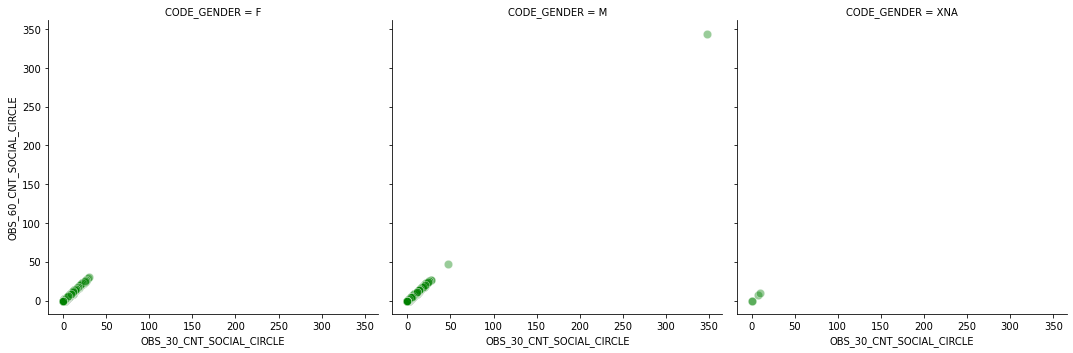


--------------------------------------------------------------------------------------------------------------------------------------------
								r = 0.9868795757744414



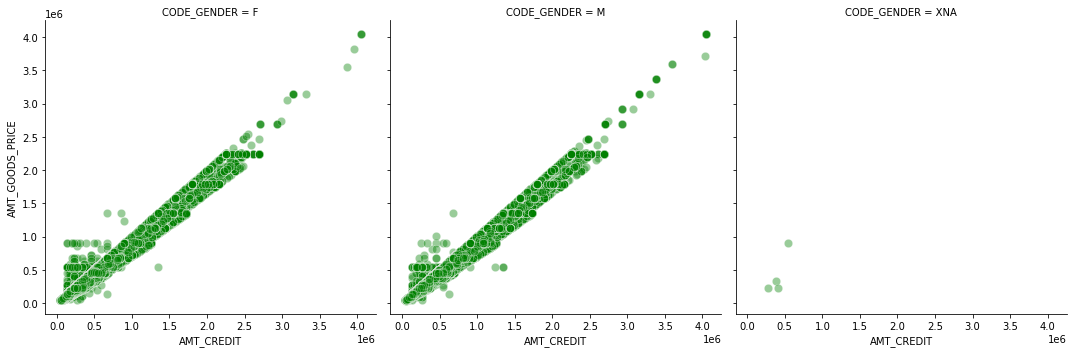


--------------------------------------------------------------------------------------------------------------------------------------------
								r = 0.9501487815924959



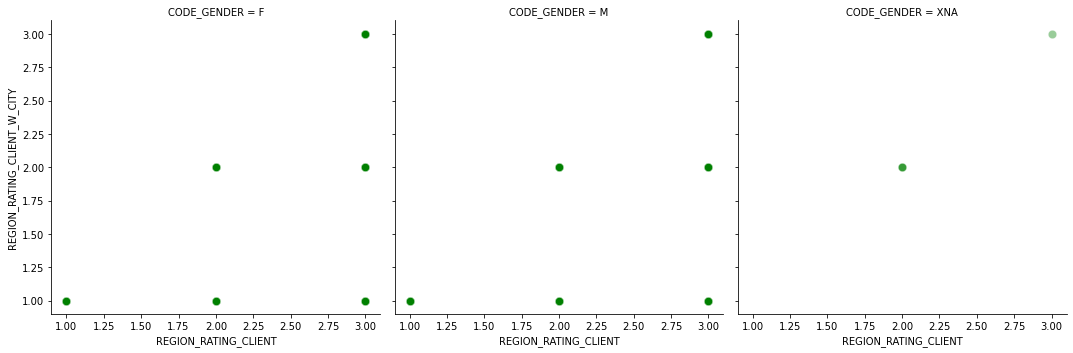


--------------------------------------------------------------------------------------------------------------------------------------------
								r = 0.878570330926489



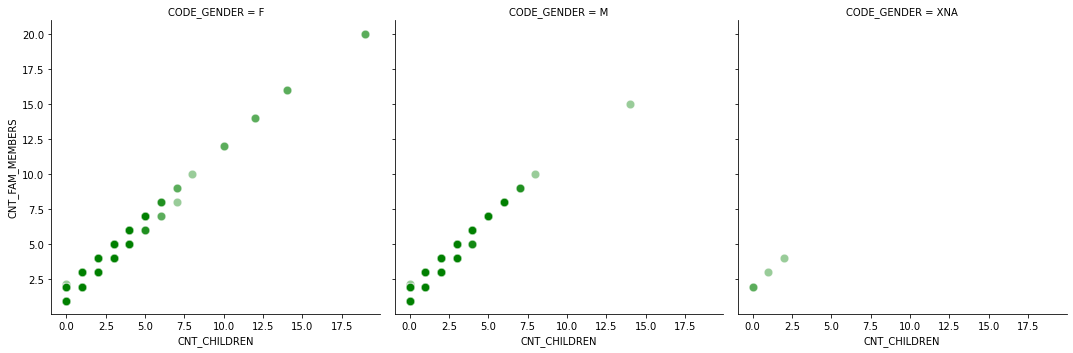


--------------------------------------------------------------------------------------------------------------------------------------------
								r = 0.8618613609137326



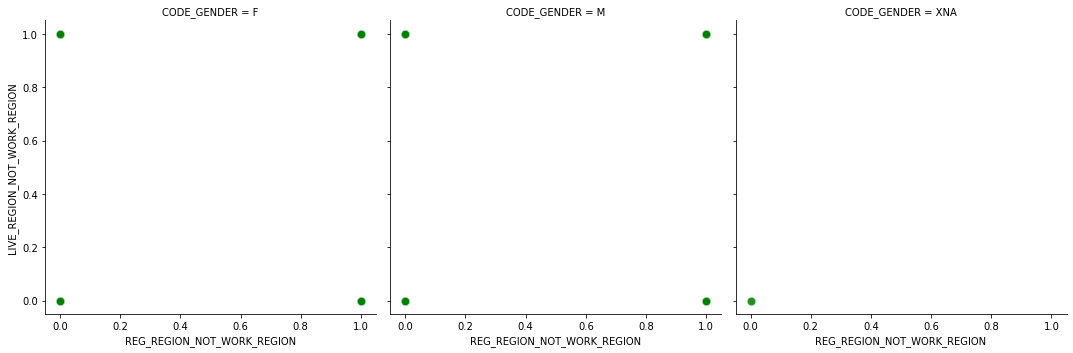


--------------------------------------------------------------------------------------------------------------------------------------------
								r = 0.8593318801369599



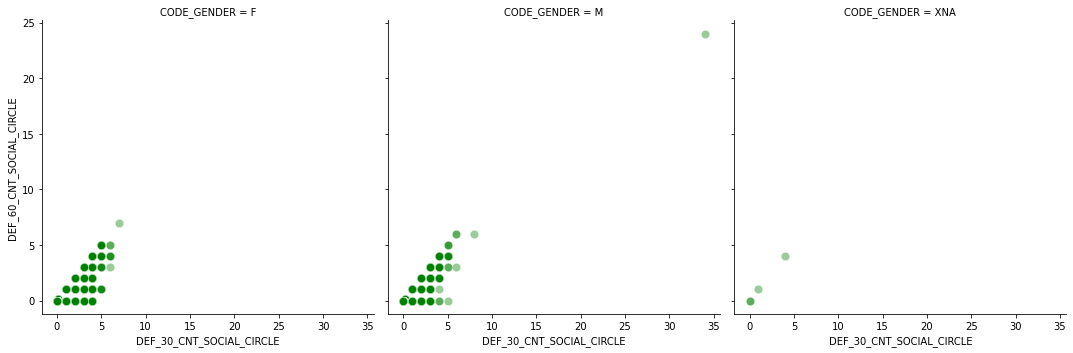


--------------------------------------------------------------------------------------------------------------------------------------------
								r = 0.8303811347892783



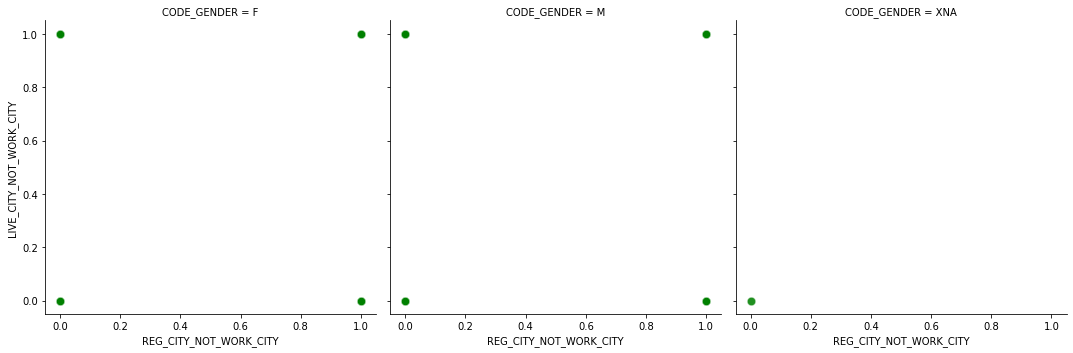


--------------------------------------------------------------------------------------------------------------------------------------------
								r = 0.776250824905811



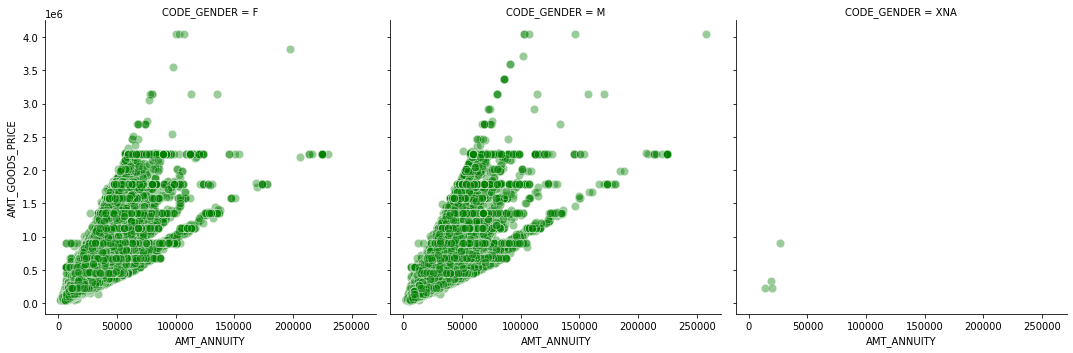


--------------------------------------------------------------------------------------------------------------------------------------------
								r = 0.7712967569052632



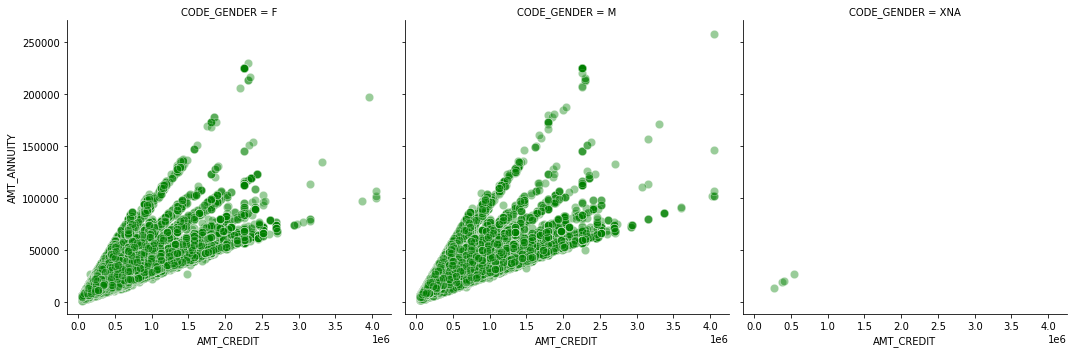


--------------------------------------------------------------------------------------------------------------------------------------------
								r = 0.6261138779530525



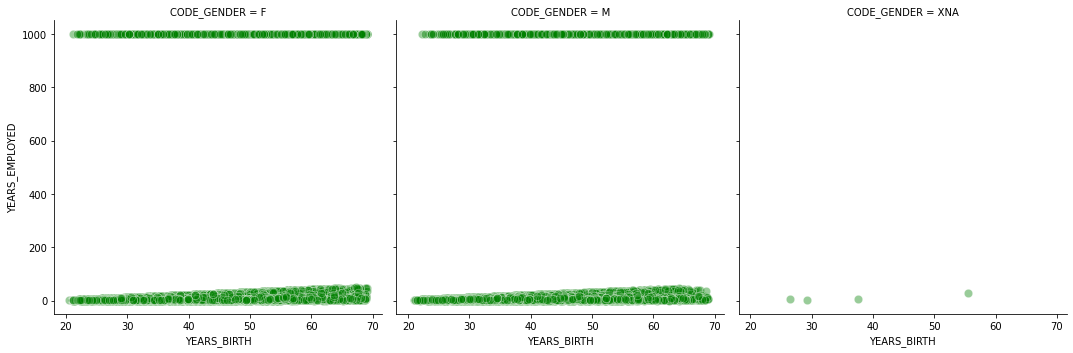


--------------------------------------------------------------------------------------------------------------------------------------------


In [33]:
for x in range(len(df_sol_0)):
  sns.relplot(data=df_0,x=df_sol_0.iloc[x]['level_0'],y=df_sol_0.iloc[x]['level_1'],col='CODE_GENDER',color='green',alpha=.4,marker='o',s=70)
  print(f"\t\t\t\t\t\t\t\tr = {df_sol_0.iloc[x][0]}\n")
  #plt.savefig(f'{x}.png',vmax='I', vmin='I', hmax='I', hmin='I',bbox_inches='tight',quality=100, optimize=True,progressive=True,pad_inches=.2)
  plt.show()
  #files.download(f'/content/{x}.png')
  print(f"\n{'-'*140}")

Top 10 features correlated if the target variable is 1

In [34]:
corr_matrix_1 = df_1.corr()

sol_1 = (corr_matrix_1.where(np.triu(np.ones(corr_matrix_1.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))

df_sol_1=pd.DataFrame(sol_1.head(10)).reset_index()
df_sol_1

level_0                      level_1         0
0    OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE  0.998269
1                  AMT_CREDIT              AMT_GOODS_PRICE  0.982566
2        REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  0.956637
3                CNT_CHILDREN              CNT_FAM_MEMBERS  0.885484
4    DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE  0.868996
5  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  0.847885
6      REG_CITY_NOT_WORK_CITY      LIVE_CITY_NOT_WORK_CITY  0.778540
7                  AMT_CREDIT                  AMT_ANNUITY  0.752195
8                 AMT_ANNUITY              AMT_GOODS_PRICE  0.752022
9              YEARS_EMPLOYED              FLAG_DOCUMENT_6  0.617646

					r = 0.9982686576193179



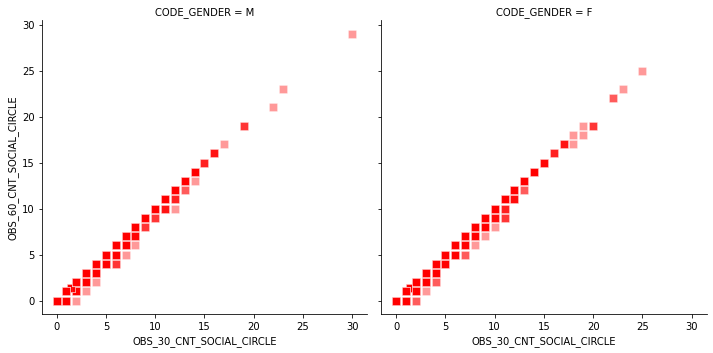


-----------------------------------------------------------------------------------------------
					r = 0.9825658505331814



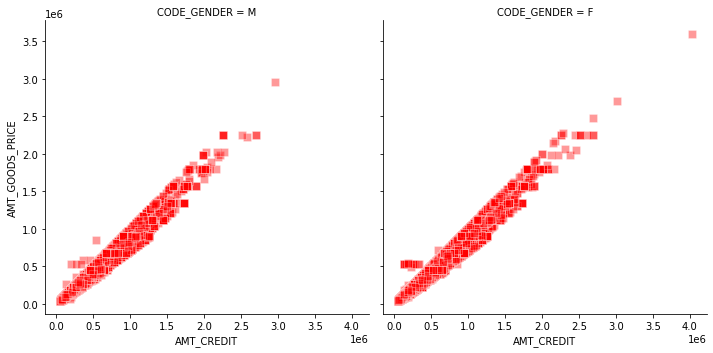


-----------------------------------------------------------------------------------------------
					r = 0.9566371636502062



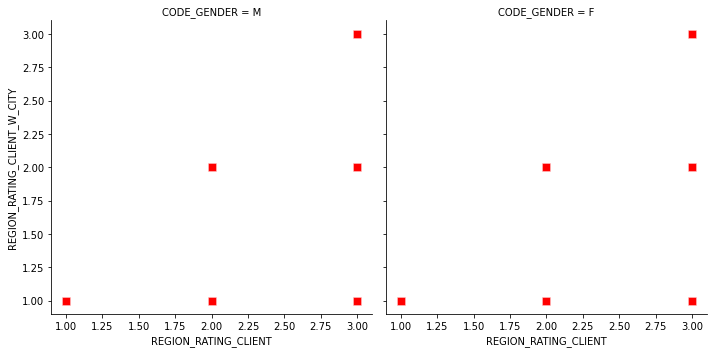


-----------------------------------------------------------------------------------------------
					r = 0.8854837134847883



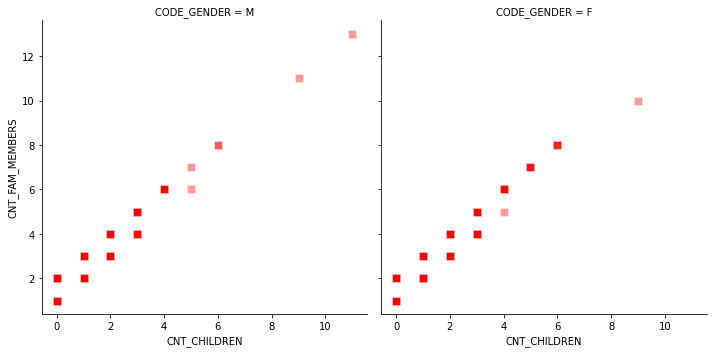


-----------------------------------------------------------------------------------------------
					r = 0.8689960179413571



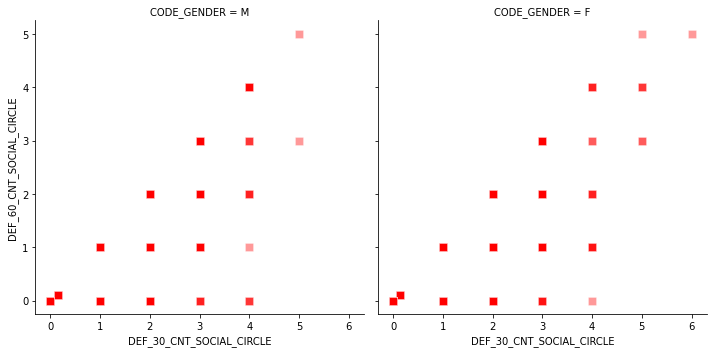


-----------------------------------------------------------------------------------------------
					r = 0.8478851763258825



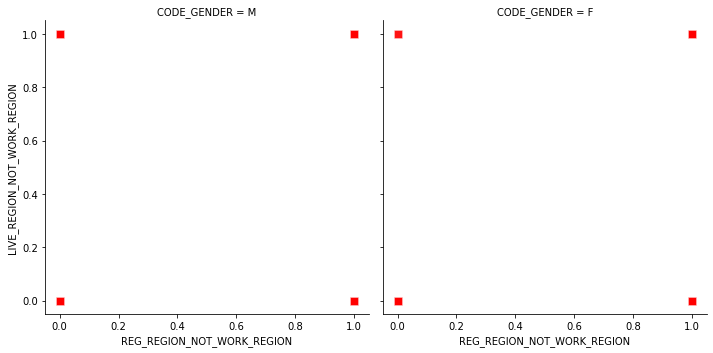


-----------------------------------------------------------------------------------------------
					r = 0.7785397399694342



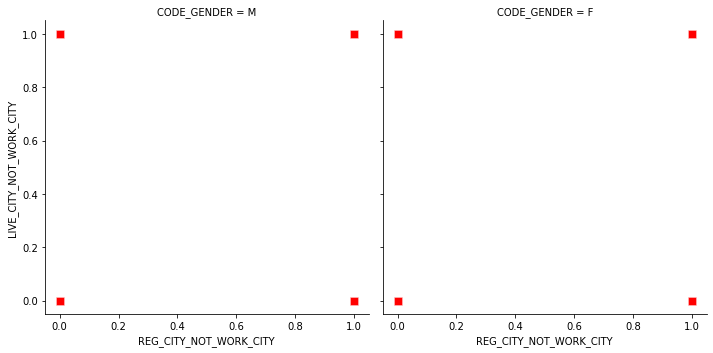


-----------------------------------------------------------------------------------------------
					r = 0.7521947353758889



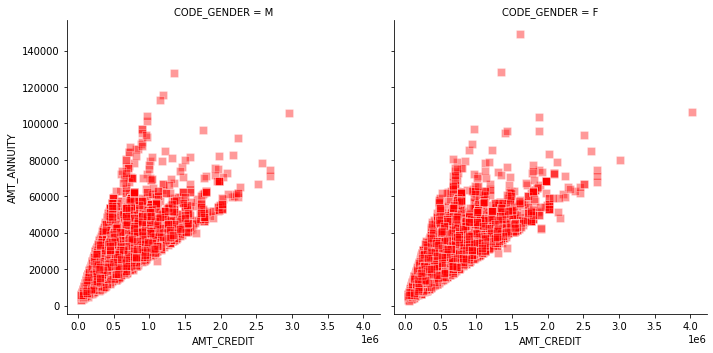


-----------------------------------------------------------------------------------------------
					r = 0.7520223995629158



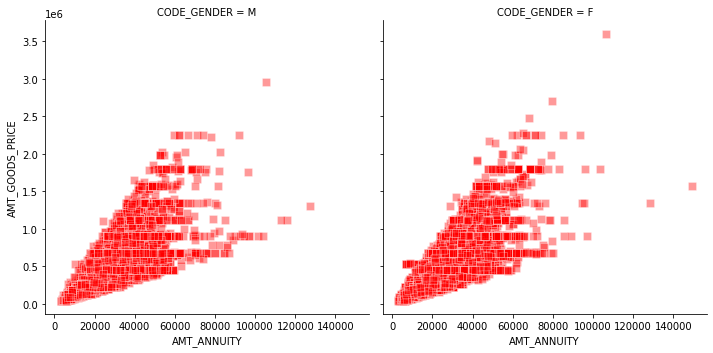


-----------------------------------------------------------------------------------------------
					r = 0.617645871010161



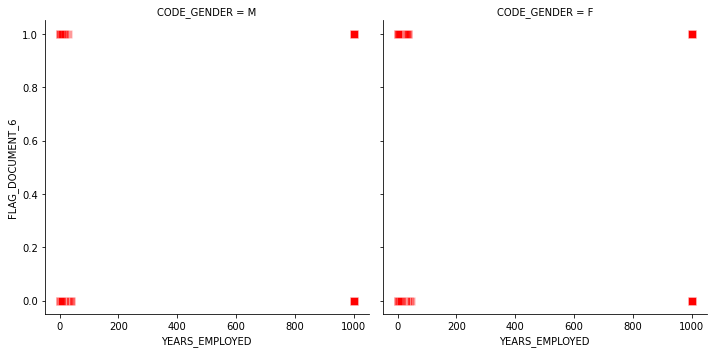


-----------------------------------------------------------------------------------------------


In [35]:
for x in range(len(df_sol_1)):
  sns.relplot(data=df_1,x=df_sol_1.iloc[x]['level_0'],y=df_sol_1.iloc[x]['level_1'],col='CODE_GENDER',color='red',alpha=.4,marker=',',s=70)
  print(f"\t\t\t\t\tr = {df_sol_1.iloc[x][0]}\n")
  #plt.savefig(f'{x}.png',vmax='I', vmin='I', hmax='I', hmin='I',bbox_inches='tight',quality=100, optimize=True,progressive=True,pad_inches=.2)
  plt.show()
  #files.download(f'/content/{x}.png')
  print(f"\n{'-'*95}")

### Previous applications data

In [36]:
previous_application = pd.read_csv('/content/gdrive/MyDrive/Datasets/upgrad_submission/previous_application.csv')
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  ...  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
0     17145.0  ...            365243.0           -42.0   
1    679671.0  ...            365243.0          -134.0   
2    136444.5  ...            365243.0          -271.0   
3    470790.0  ...            365243.0          -482.0   
4    404055.0  ...                 NaN             NaN   

  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0                     300.0          -42.0            -37.0   
1                     916.0       365243.0         365243.0   
2                      59.0       365243.0         365243.0   
3                    -152.0         -182.0           -177.0   
4                       NaN            NaN              NaN   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1                        1.0  
2                        1.0  
3                        1.0  
4                        NaN  

[5 rows x 37 columns]

#### Basic information about the data 

In [37]:
print(f"for the previous applications we have {previous_application.shape[0]} datapoints and {previous_application.shape[1]} features")

for the previous applications we have 1670214 datapoints and 37 features


In [38]:
#getting the information about the each of the columns 
previous_application.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [39]:
#this will help us to take a look at the count,mean ,std deviation,min ,max and the interquartile range of the data 
previous_application.describe().T

count          mean            std        min  \
SK_ID_PREV                 1670214.0  1.923089e+06  532597.958696  1000001.0   
SK_ID_CURR                 1670214.0  2.783572e+05  102814.823849   100001.0   
AMT_ANNUITY                1297979.0  1.595512e+04   14782.137335        0.0   
AMT_APPLICATION            1670214.0  1.752339e+05  292779.762387        0.0   
AMT_CREDIT                 1670213.0  1.961140e+05  318574.616546        0.0   
...                              ...           ...            ...        ...   
DAYS_FIRST_DUE              997149.0  1.382627e+04   72444.869708    -2892.0   
DAYS_LAST_DUE_1ST_VERSION   997149.0  3.376777e+04  106857.034789    -2801.0   
DAYS_LAST_DUE               997149.0  7.658240e+04  149647.415123    -2889.0   
DAYS_TERMINATION            997149.0  8.199234e+04  153303.516729    -2874.0   
NFLAG_INSURED_ON_APPROVAL   997149.0  3.325702e-01       0.471134        0.0   

                                  25%        50%         75%          max  
SK_ID_PREV                 1461857.25  1923110.5  2384279.75  2845382.000  
SK_ID_CURR                  189329.00   278714.5   367514.00   456255.000  
AMT_ANNUITY                   6321.78    11250.0    20658.42   418058.145  
AMT_APPLICATION              18720.00    71046.0   180360.00  6905160.000  
AMT_CREDIT                   24160.50    80541.0   216418.50  6905160.000  
...                               ...        ...         ...          ...  
DAYS_FIRST_DUE               -1628.00     -831.0     -411.00   365243.000  
DAYS_LAST_DUE_1ST_VERSION    -1242.00     -361.0      129.00   365243.000  
DAYS_LAST_DUE                -1314.00     -537.0      -74.00   365243.000  
DAYS_TERMINATION             -1270.00     -499.0      -44.00   365243.000  
NFLAG_INSURED_ON_APPROVAL        0.00        0.0        1.00        1.000  

[21 rows x 8 columns]

We can observe that there might have some outliers in the data 

#### Missing value analysis

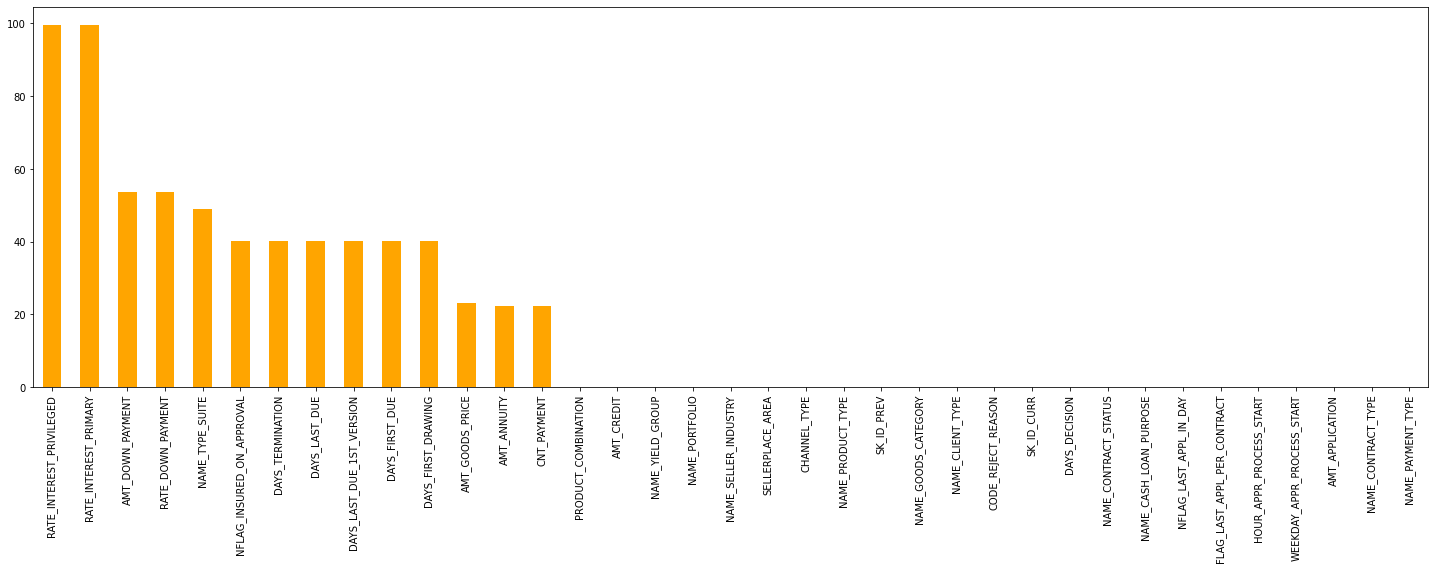

In [40]:
((previous_application.isna().mean().sort_values(ascending=False))*100).plot(kind='bar',figsize=(25,7),color='orange')
plt.show()

We have multiple features which having missing value greater than 50 
this 50 will be our decisive factor we have selected for the analysis so that we have good result 

so let's drop those features

In [41]:
df_previous = previous_application.loc[:, previous_application.isnull().mean() < .50]
print(f"after dropping the features we have {df_previous.shape[0]} datapoints and {df_previous.shape[1]} features")

after dropping the features we have 1670214 datapoints and 33 features


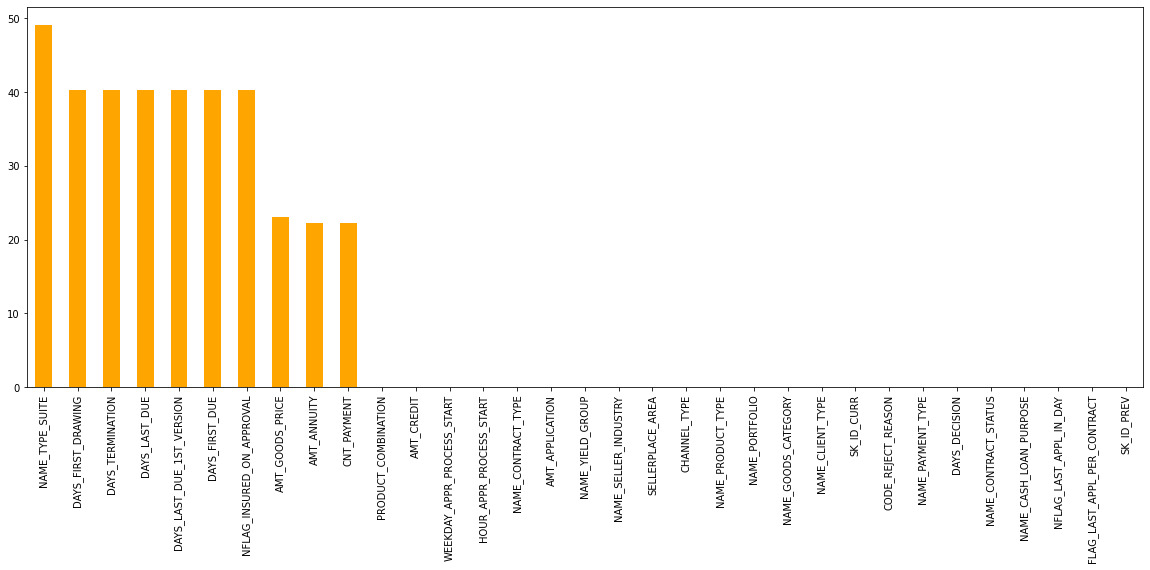

In [42]:
((df_previous.isna().mean().sort_values(ascending=False))*100).plot(kind='bar',figsize=(20,7),color='orange')
plt.show()

now, we are not considering the data which is missing more than 10 percent as if we use that for the further analysis it might affect our hypothesis


In [43]:
df_previous = previous_application.loc[:, previous_application.isnull().mean() < .10]
print(f"after dropping the features we have {df_previous.shape[0]} datapoints and {df_previous.shape[1]} features")

after dropping the features we have 1670214 datapoints and 23 features


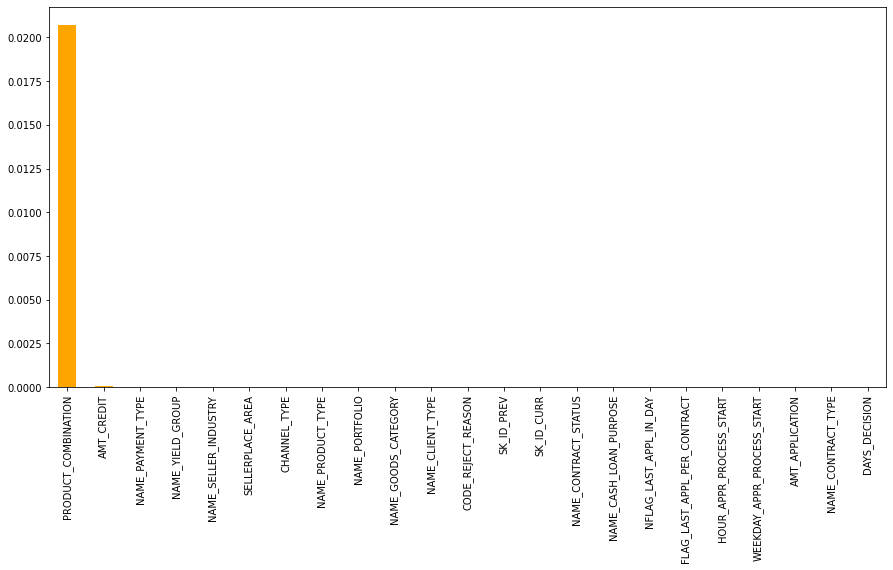

In [44]:
((df_previous.isna().mean().sort_values(ascending=False))*100).plot(kind='bar',figsize=(15,7),color='orange')
plt.show()

we have now good data for the further analysis

In [45]:
#This are the columns that have missing values 
(df_previous.isna().mean().sort_values(ascending=False)>0).sum()

2

In [46]:
list_of_null_columns=[]

for k,v in (df_previous.isna().mean().sort_values(ascending=False)>0)[:(df_previous.isna().mean().sort_values(ascending=False)>0).sum()].items():
    list_of_null_columns.append(k)

for x in list_of_null_columns:
    print(f"{nan_checking(df_previous[x])}")

missing values filled with mode
because for PRODUCT_COMBINATION mode is the best method to fill but there is no abs difference as the dtype is object

missing values filled with mean
because for AMT_CREDIT mean is the best value to fill and the absolute difference is 0.0



In [47]:
(df_previous.isna().mean().sort_values(ascending=False)>0).sum()

0

As we can see that the data is now not empty we have successfully worked on the missing data 

#### Data cleaning  

In [48]:
#checking the data 
import random
df_previous.iloc[random.randint(0,len(df_previous))]

SK_ID_PREV                                  1138557
SK_ID_CURR                                   294266
NAME_CONTRACT_TYPE                   Consumer loans
AMT_APPLICATION                            142561.8
AMT_CREDIT                                 142561.8
                                   ...             
CHANNEL_TYPE                           Country-wide
SELLERPLACE_AREA                                 -1
NAME_SELLER_INDUSTRY                   Connectivity
NAME_YIELD_GROUP                         low_normal
PRODUCT_COMBINATION     POS mobile without interest
Name: 1076015, Length: 23, dtype: object

In [49]:
#This is the description of the important target variables we are going to look forward for 
for x in df_previous.columns.to_list()[1:]: 
  print(f"{x} : {columns_description.iloc[columns_description[columns_description['Row']==x].index[0]].Description}\n")

SK_ID_CURR : ID of loan in our sample

NAME_CONTRACT_TYPE : Identification if loan is cash or revolving

AMT_APPLICATION : For how much credit did client ask on the previous application

AMT_CREDIT : Credit amount of the loan

WEEKDAY_APPR_PROCESS_START : On which day of the week did the client apply for the loan

HOUR_APPR_PROCESS_START : Approximately at what hour did the client apply for the loan

FLAG_LAST_APPL_PER_CONTRACT : Flag if it was last application for the previous contract. Sometimes by mistake of client or our clerk there could be more applications for one single contract

NFLAG_LAST_APPL_IN_DAY : Flag if the application was the last application per day of the client. Sometimes clients apply for more applications a day. Rarely it could also be error in our system that one application is in the database twice

NAME_CASH_LOAN_PURPOSE : Purpose of the cash loan

NAME_CONTRACT_STATUS : Contract status (approved, cancelled, ...) of previous application

DAYS_DECISION : Relati

we have some columns which are inappropreate so we need to work on that 

we are going to convert days into the positive numbers as the data we recieved has the days in the previous format

In [50]:
#converting days to years 
data_cleaning=["DAYS_DECISION"]

for x in data_cleaning:
  df_previous[x]=df_previous[x].abs()

#### Distribution of data

In [51]:
df_previous['NAME_CONTRACT_STATUS'].value_counts(normalize=True)*100

Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: NAME_CONTRACT_STATUS, dtype: float64

We can see that there is imbalence in the data 

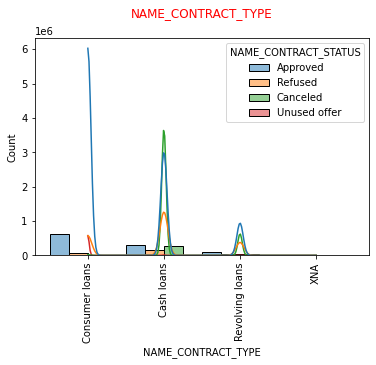

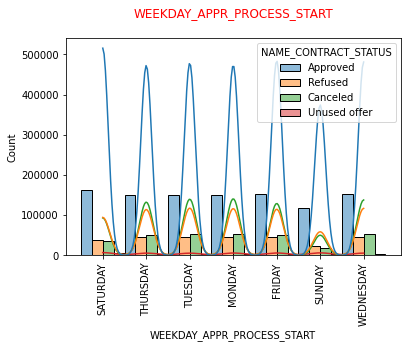

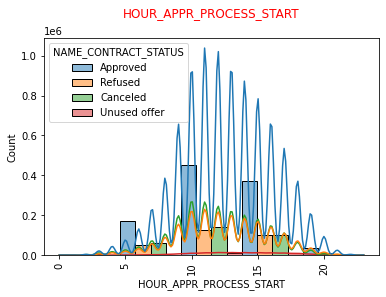

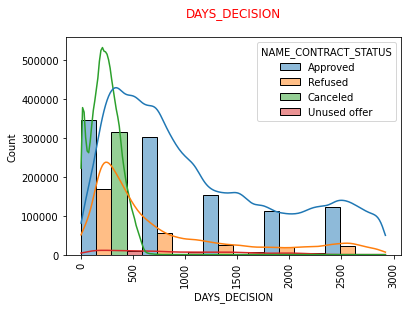

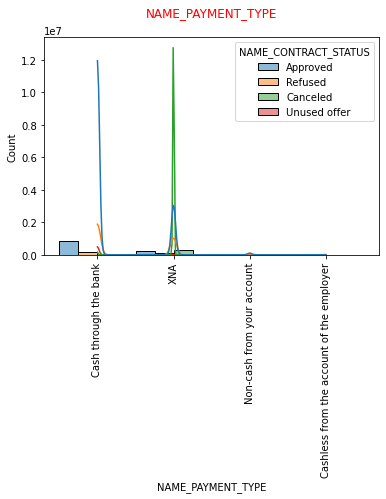

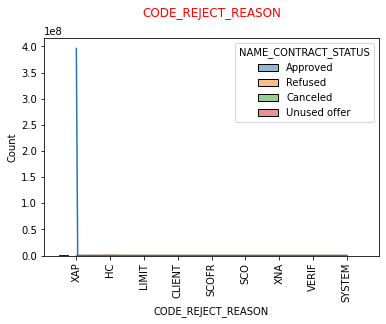

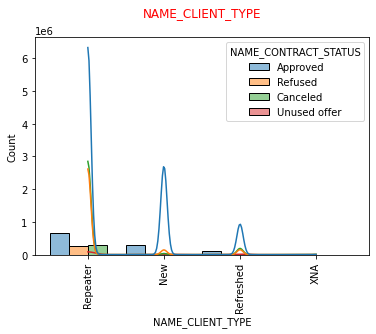

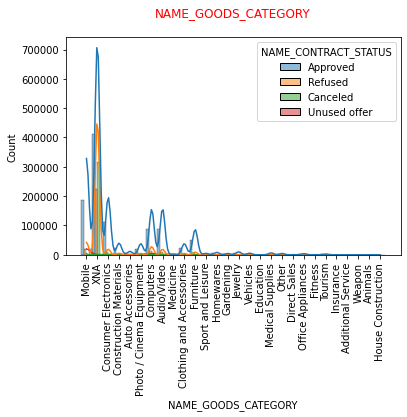

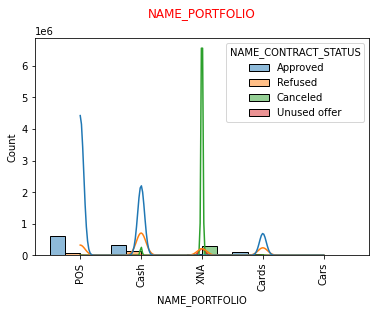

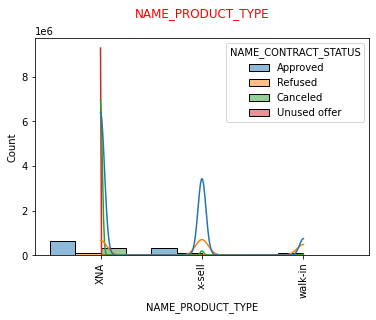

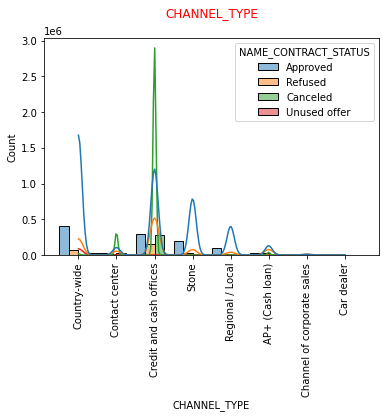

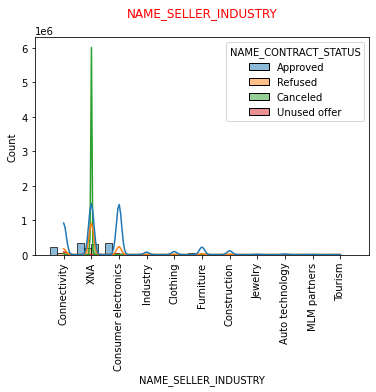

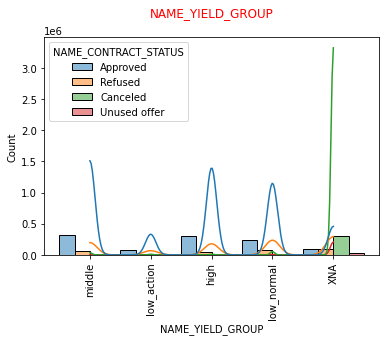

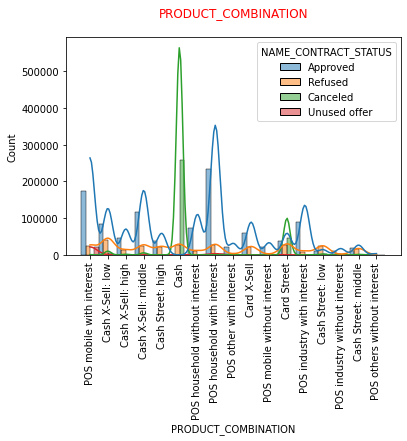

In [52]:
mul = ['NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']

for s in mul:
  sns.histplot(data=df_previous, x=s,hue='NAME_CONTRACT_STATUS',multiple="dodge",kde=True,bins=5)
  plt.title(f"{s}\n",color='red')
  plt.xticks(rotation=90)
  #plt.savefig(f'{s}.png',vmax='I', vmin='I', hmax='I', hmin='I',bbox_inches='tight',quality=100, optimize=True,progressive=True,pad_inches=.2)
  plt.show()
  #files.download(f'/content/{s}.png')
  print()

- people with consumer loans are most likely to get approval while cash loans are getting cancelled the most

- Saturdays and Wednesdays are the days where mostly contracts got approved

- majority applications approved in 10-15 hrs of working hours 

- applications which took around 500 days got cancelled the most 

- xna payment types are getting cancelled the most

- it is interesting to know that repeaters got more approvals than any other categories 

- people with mobile ,xna , consumer electronics  and construction materials are getting more approvals

- xna portfolios are getting cancelled the most 

- people with xna product type  are getting more approvals 

- credited and cash offices applications are getting cancelled the most 

- in the previous applications people with xna seller industry and name yield group got the most application cancel 


- pos household without interest ,pos other with interest ,pos other with interest are the product combinations who has received the most approvals

#### Correlation

creating the copy of the data and then going to do encoding so that we will get the correlations of categorical features as well 

In [53]:
df_previous_copy = df_previous.copy(deep=True)

In [54]:
encode=[]
for obj in df_previous_copy.columns:
    if df_previous_copy[obj].dtypes == 'object':
        encode.append(obj)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for en in encode:
    df_previous_copy[en]=le.fit_transform(df_previous_copy[en])

checking if we have succesfully encoded the objects 

In [55]:
df_previous_copy.dtypes is not 'object'

True

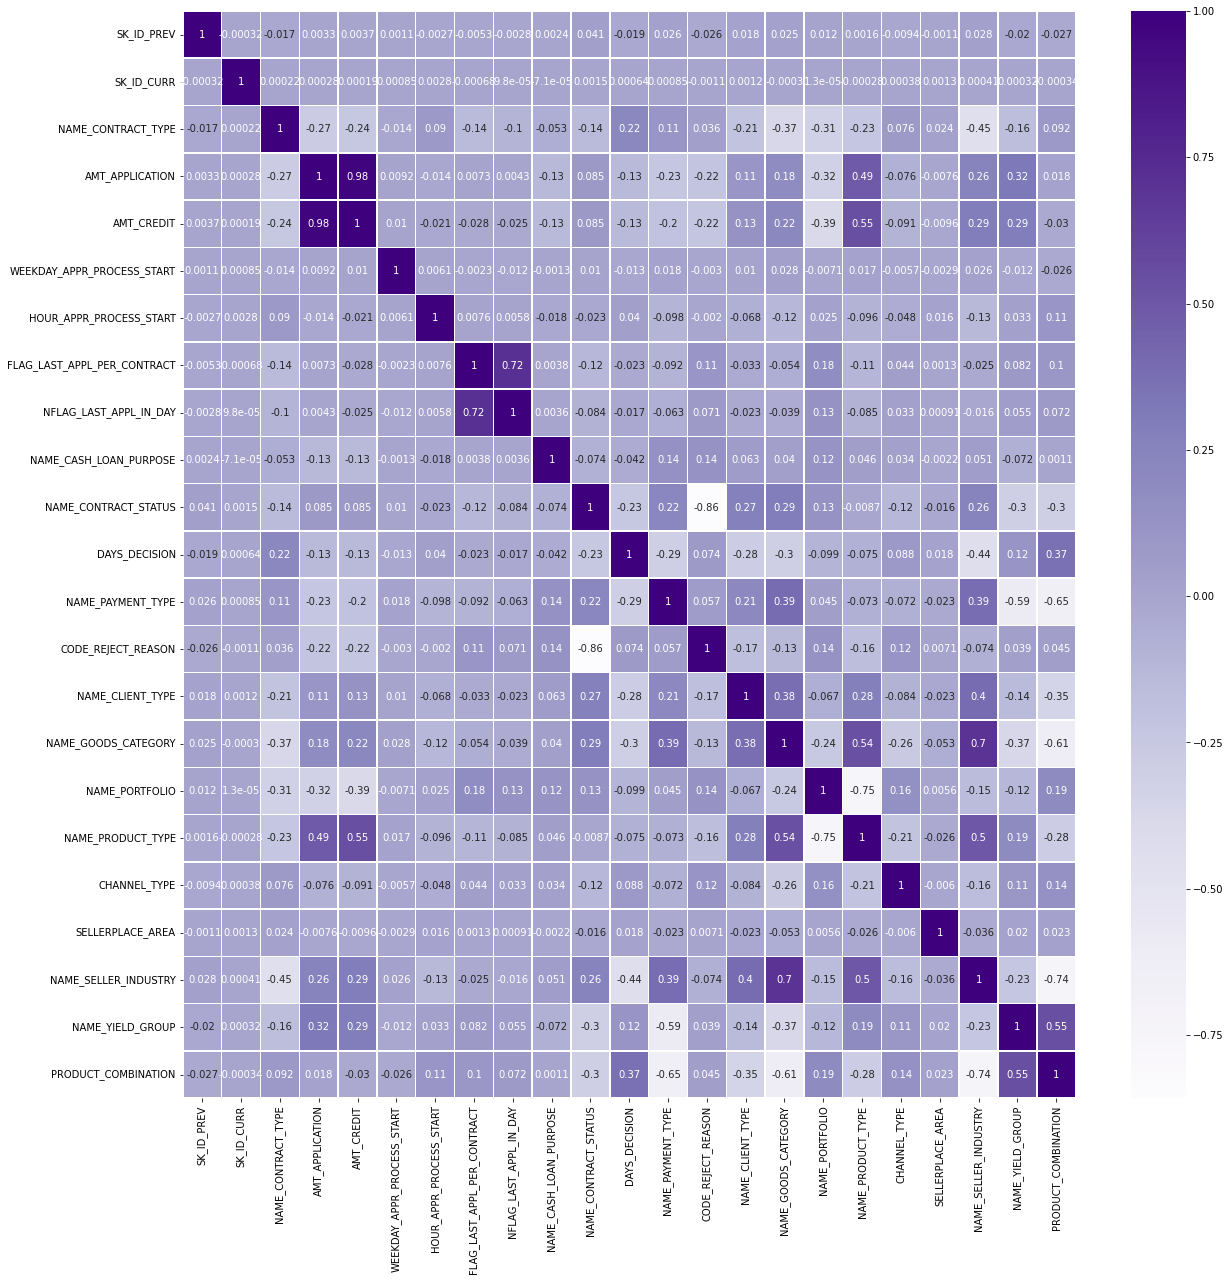

In [56]:
plt.figure(figsize=[20,20])
sns.heatmap(df_previous_copy.corr(),linewidths=.5,cmap="Purples",annot=True)
plt.show()

correlation with the target variable

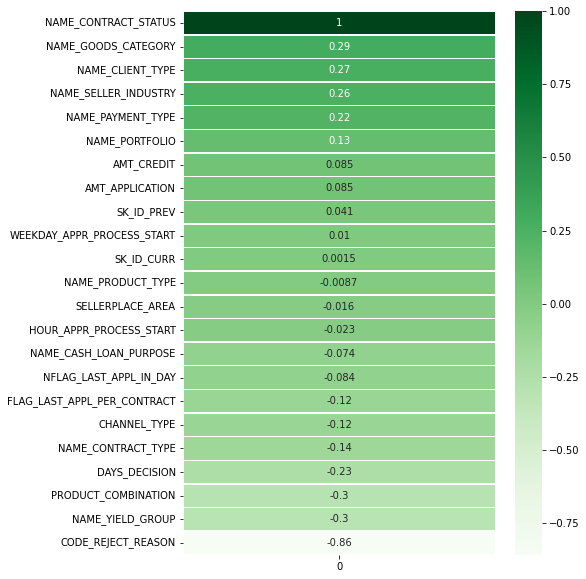

In [57]:
plt.figure(figsize=[7,10])
sns.heatmap(pd.DataFrame(df_previous_copy.corrwith(df_previous_copy["NAME_CONTRACT_STATUS"]).sort_values(ascending=False)),linewidths=.5,cmap="Greens",annot=True)
plt.show()

here we have positive as well as negative correlation with respect to the target variable

a positive correlation between variable a and b means that as a changes positively b also changes positively

while variables whith negative correlation follows the inversion law they are opposite to change with each other

In [58]:
#this are the top 10 features that are correlated with the target variable 
pd.DataFrame(df_previous_copy.corrwith(df_previous_copy["NAME_CONTRACT_STATUS"]).sort_values(ascending=False)).index[1:11].to_list()

['NAME_GOODS_CATEGORY',
 'NAME_CLIENT_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_PAYMENT_TYPE',
 'NAME_PORTFOLIO',
 'AMT_CREDIT',
 'AMT_APPLICATION',
 'SK_ID_PREV',
 'WEEKDAY_APPR_PROCESS_START',
 'SK_ID_CURR']

#### Categorical features 

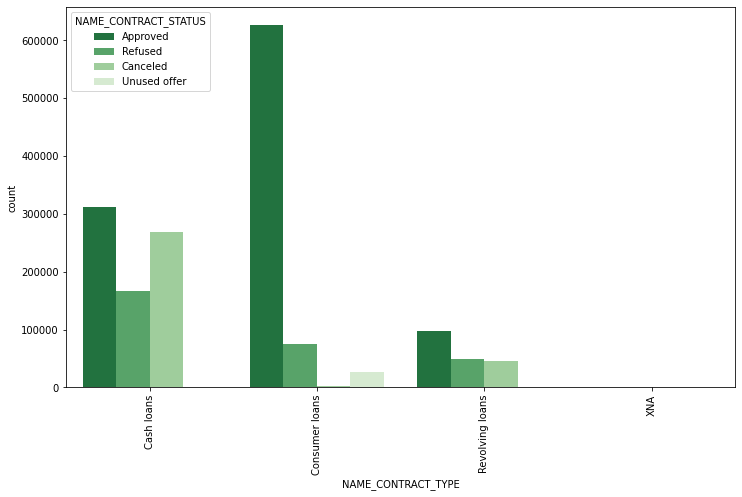

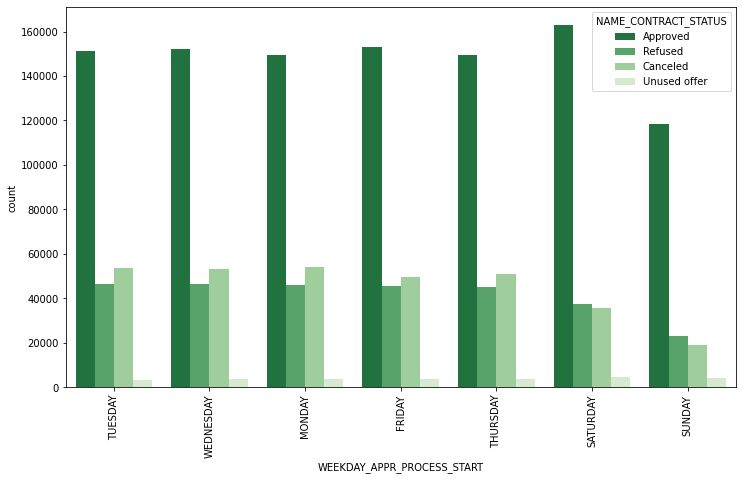

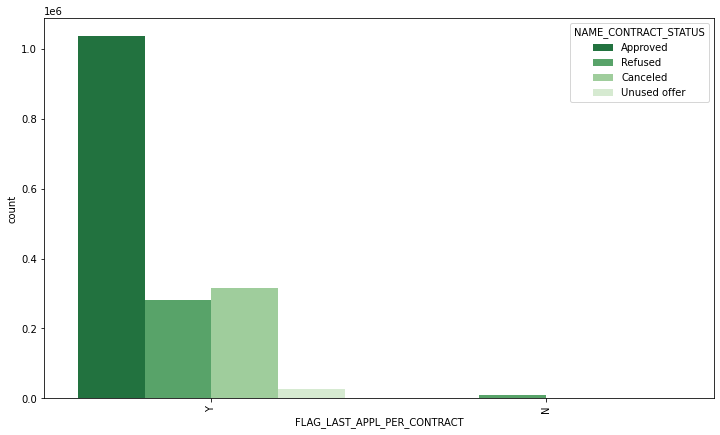

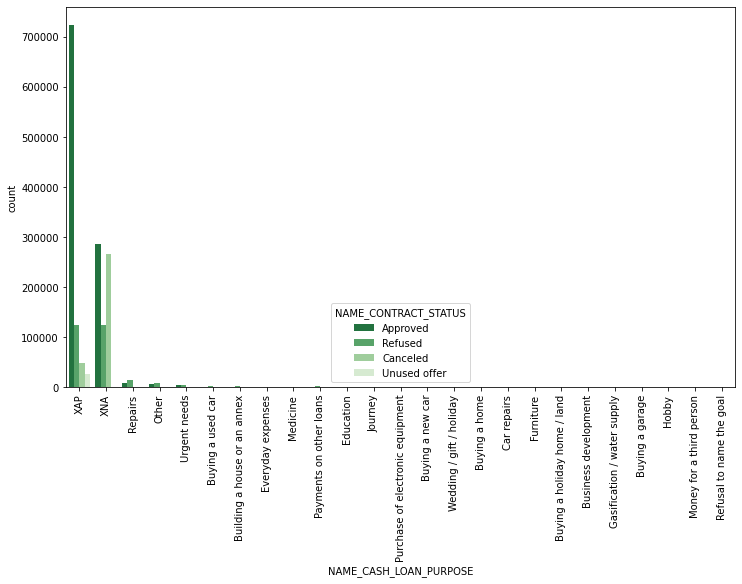

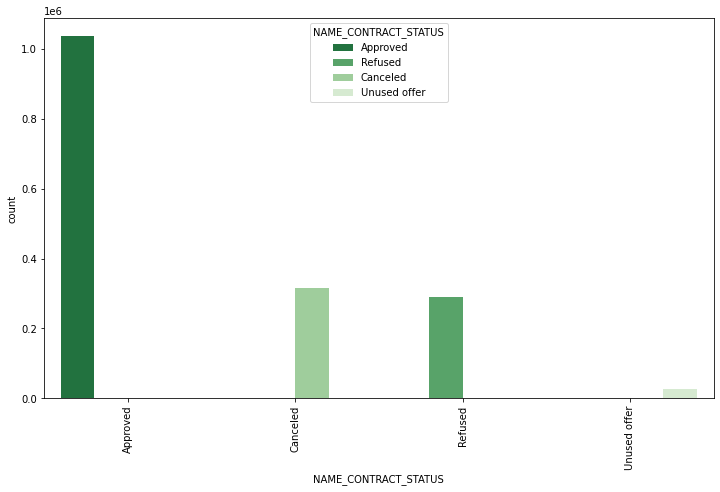

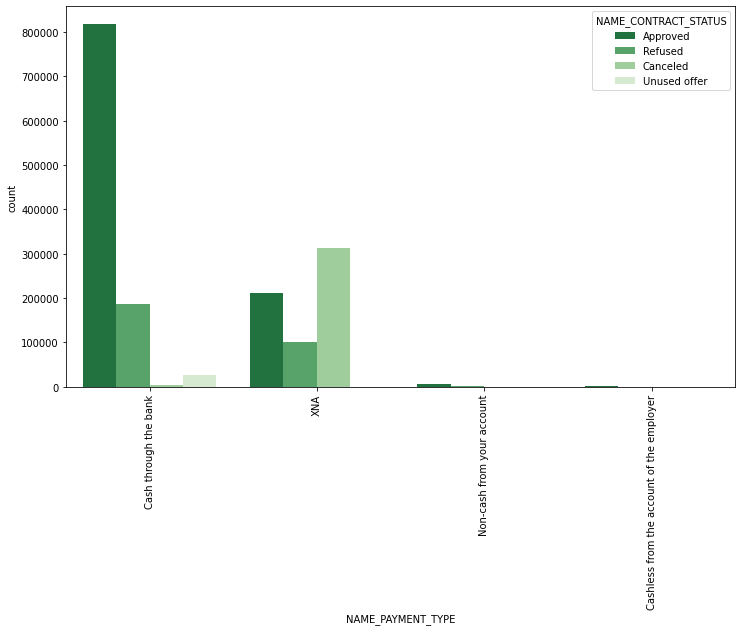

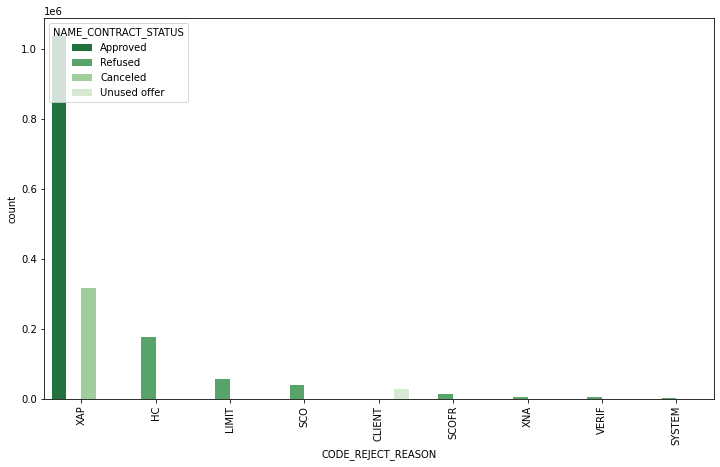

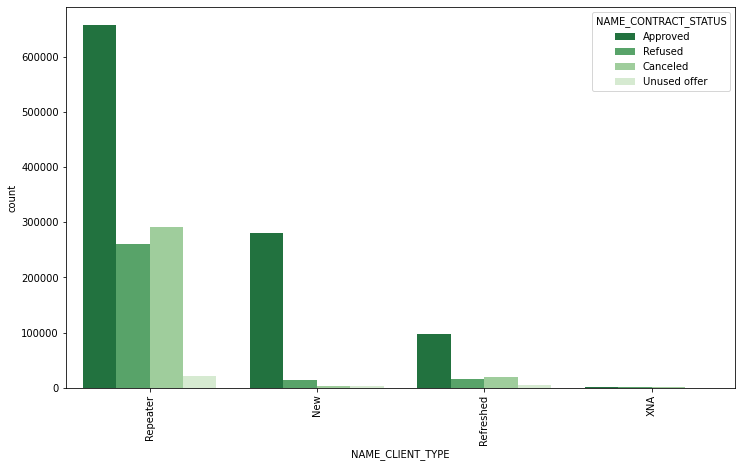

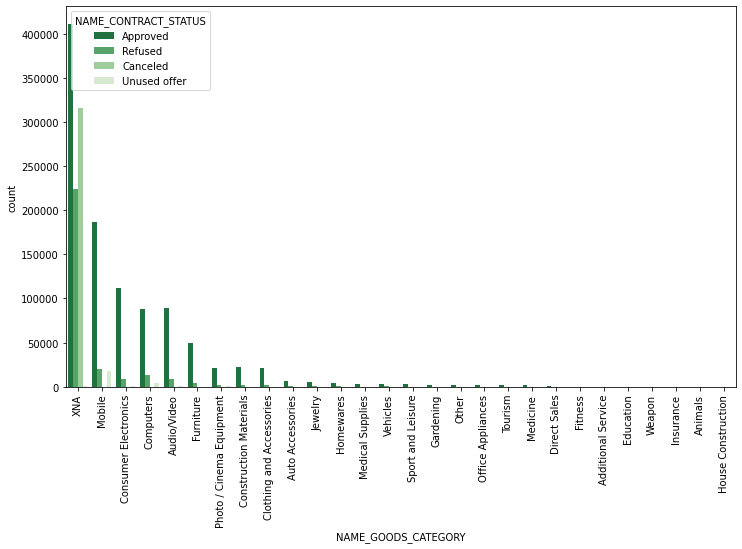

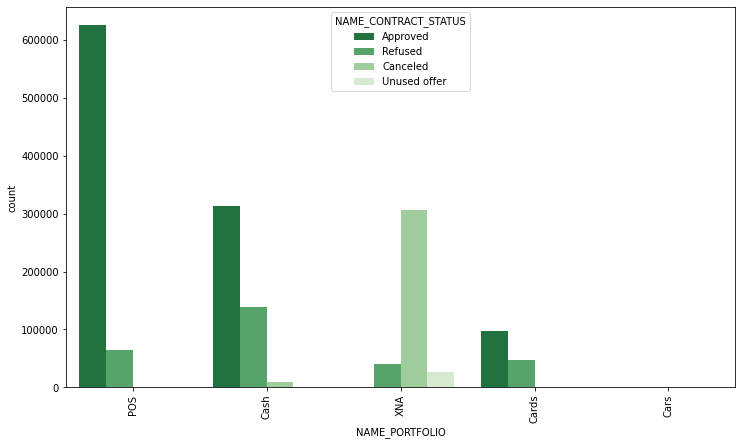

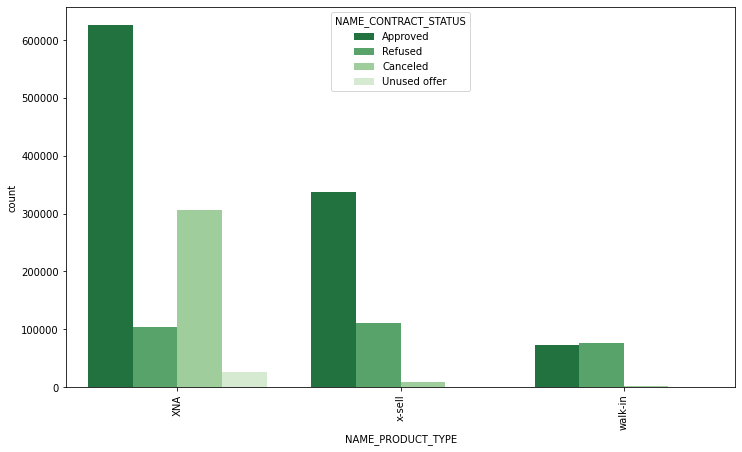

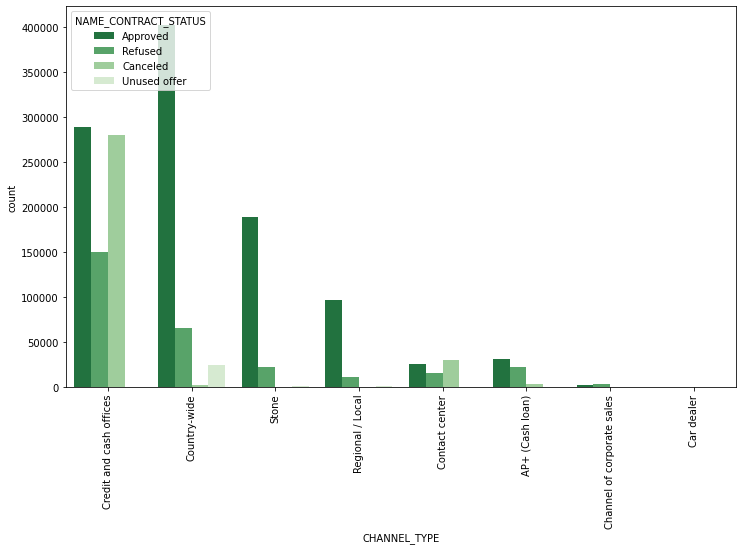

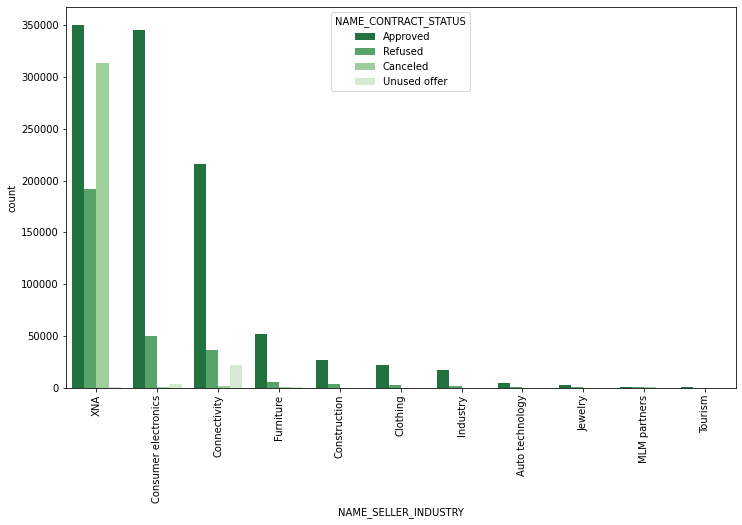

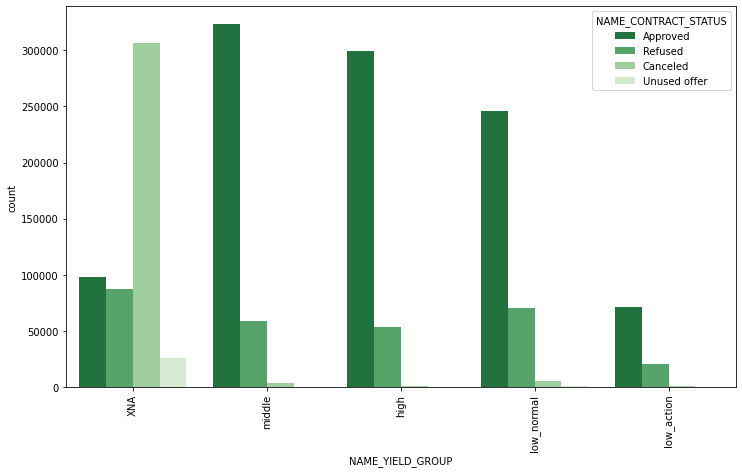

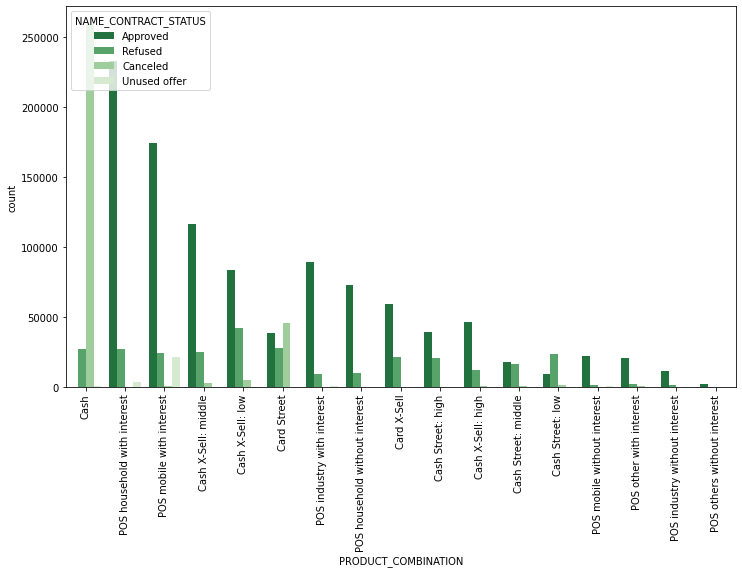

In [59]:
for x in df_previous.columns.to_list():
  if df_previous[x].dtype == 'object':
    plt.figure(figsize=(12,7)) #length x height 
    sns.countplot(df_previous[x],palette="Greens_r",order=df_previous[x].value_counts().index.to_list(),hue=df_previous['NAME_CONTRACT_STATUS'])
    plt.xticks(rotation=90)
    #plt.savefig(f'{x}.png',vmax='I', vmin='I', hmax='I', hmin='I',bbox_inches='tight',quality=100, optimize=True,progressive=True,pad_inches=.2)
    plt.show()
    #files.download(f'/content/{x}.png')
    print('\n\n')

- xna categories are the most interactive categories also they are getting rejected the most

#### Outliers in the data 

In [60]:
#this are the numbers of outliers in the particular columns having values greater than 3rd standard deviation of the data
from scipy import stats
for i in df_previous.columns.to_list():
  if df_previous[i].dtypes != 'object':
    print( i, ":", end= " ")
    print(df_previous.iloc[np.where(np.abs(stats.zscore(df_previous[i])>3))].shape[0])

SK_ID_PREV : 0
SK_ID_CURR : 0
AMT_APPLICATION : 50112
AMT_CREDIT : 46983
HOUR_APPR_PROCESS_START : 202
NFLAG_LAST_APPL_IN_DAY : 0
DAYS_DECISION : 0
SELLERPLACE_AREA : 1451


### Merging two data together

In [61]:
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  ...  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  \
0               Y  ...                 0                 0                 0   
1               N  ...                 0                 0                 0   
2               Y  ...                 0                 0                 0   
3               Y  ...                 0                 0                 0   
4               Y  ...                 0                 0                 0   

   FLAG_DOCUMENT_19  FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  
0                 0                 0                0  
1                 0                 0                0  
2                 0                 0                0  
3                 0                 0                0  
4                 0                 0                0  

[5 rows x 65 columns]

In [62]:
df_previous.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_APPLICATION  AMT_CREDIT  \
0     2030495      271877     Consumer loans          17145.0     17145.0   
1     2802425      108129         Cash loans         607500.0    679671.0   
2     2523466      122040         Cash loans         112500.0    136444.5   
3     2819243      176158         Cash loans         450000.0    470790.0   
4     1784265      202054         Cash loans         337500.0    404055.0   

  WEEKDAY_APPR_PROCESS_START  ...  NAME_PRODUCT_TYPE             CHANNEL_TYPE  \
0                   SATURDAY  ...                XNA             Country-wide   
1                   THURSDAY  ...             x-sell           Contact center   
2                    TUESDAY  ...             x-sell  Credit and cash offices   
3                     MONDAY  ...             x-sell  Credit and cash offices   
4                   THURSDAY  ...            walk-in  Credit and cash offices   

   SELLERPLACE_AREA NAME_SELLER_INDUSTRY NAME_YIELD_GROUP  \
0                35         Connectivity           middle   
1                -1                  XNA       low_action   
2                -1                  XNA             high   
3                -1                  XNA           middle   
4                -1                  XNA             high   

        PRODUCT_COMBINATION  
0  POS mobile with interest  
1          Cash X-Sell: low  
2         Cash X-Sell: high  
3       Cash X-Sell: middle  
4         Cash Street: high  

[5 rows x 23 columns]

In [63]:
## Merging the two files to do some analysis
NewLeftPrev = pd.merge(df, df_previous, how='left', on=['SK_ID_CURR'])

In [64]:
NewLeftPrev.shape

(1430155, 87)

In [65]:
print(f"for the merged data we have {NewLeftPrev.shape[0]} datapoints and {NewLeftPrev.shape[1]} features")

for the merged data we have 1430155 datapoints and 87 features


#### Basic understanding of the data

In [66]:
#getting the information about the each of the columns 
NewLeftPrev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430155 entries, 0 to 1430154
Data columns (total 87 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   SK_ID_CURR                    1430155 non-null  int64  
 1   TARGET                        1430155 non-null  int64  
 2   NAME_CONTRACT_TYPE_x          1430155 non-null  object 
 3   CODE_GENDER                   1430155 non-null  object 
 4   FLAG_OWN_CAR                  1430155 non-null  object 
 5   FLAG_OWN_REALTY               1430155 non-null  object 
 6   CNT_CHILDREN                  1430155 non-null  int64  
 7   AMT_INCOME_TOTAL              1430155 non-null  float64
 8   AMT_CREDIT_x                  1430155 non-null  float64
 9   AMT_ANNUITY                   1430155 non-null  float64
 10  AMT_GOODS_PRICE               1430155 non-null  float64
 11  NAME_TYPE_SUITE               1430155 non-null  object 
 12  NAME_INCOME_TYPE            

In [67]:
#this will help us to take a look at the count,mean ,std deviation,min ,max and the interquartile range of the data 
NewLeftPrev.describe().T

count           mean            std       min  \
SK_ID_CURR                 1430155.0  278470.247890  102802.095340  100002.0   
TARGET                     1430155.0       0.086242       0.280722       0.0   
CNT_CHILDREN               1430155.0       0.403887       0.716518       0.0   
AMT_INCOME_TOTAL           1430155.0  173603.622588  198330.285287   25650.0   
AMT_CREDIT_x               1430155.0  589338.592951  387420.355419   45000.0   
...                              ...            ...            ...       ...   
AMT_CREDIT_y               1413701.0  196354.085950  319481.137722       0.0   
HOUR_APPR_PROCESS_START_y  1413701.0      12.478929       3.331474       0.0   
NFLAG_LAST_APPL_IN_DAY     1413701.0       0.996432       0.059626       0.0   
DAYS_DECISION              1413701.0     880.367039     783.540171       1.0   
SELLERPLACE_AREA           1413701.0     314.987811    7695.081664      -1.0   

                                25%       50%       75%          max  
SK_ID_CURR                 189361.0  278956.0  367509.0     456255.0  
TARGET                          0.0       0.0       0.0          1.0  
CNT_CHILDREN                    0.0       0.0       1.0         19.0  
AMT_INCOME_TOTAL           112500.0  157500.0  211500.0  117000000.0  
AMT_CREDIT_x               270000.0  508495.5  808650.0    4050000.0  
...                             ...       ...       ...          ...  
AMT_CREDIT_y                24880.5   80595.0  215640.0    4509688.5  
HOUR_APPR_PROCESS_START_y      10.0      12.0      15.0         23.0  
NFLAG_LAST_APPL_IN_DAY          1.0       1.0       1.0          1.0  
DAYS_DECISION                 271.0     582.0    1313.0       2922.0  
SELLERPLACE_AREA               -1.0       4.0      85.0    4000000.0  

[61 rows x 8 columns]

#### Missing value analysis

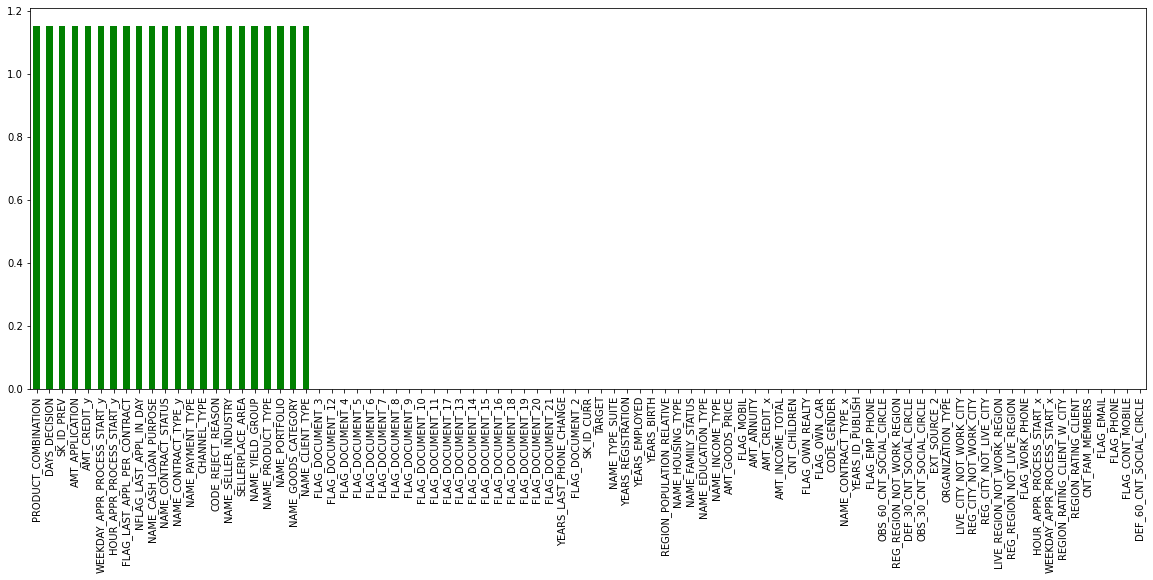

In [68]:
#there must be some null as we have murged with the new applications
(NewLeftPrev.isna().mean().sort_values(ascending=False)*100).plot(kind='bar',figsize=(20,7),color='green')
plt.show()

In [69]:
#This is the description of the important target variables we are going to look forward for 
defination=["TARGET","CODE_GENDER","NAME_CONTRACT_STATUS"]
for x in defination: 
  print(f"{x} : {columns_description.iloc[columns_description[columns_description['Row']==x].index[0]].Description}\n")

TARGET : Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)

CODE_GENDER : Gender of the client

NAME_CONTRACT_STATUS : Contract status (approved, cancelled, ...) of previous application



#### Correlation

In [70]:
corr_matrix_NewLeftPrev = NewLeftPrev.corr().abs()

sol_NewLeftPrev = (corr_matrix_NewLeftPrev.where(np.triu(np.ones(corr_matrix_NewLeftPrev.shape), k=1).astype(np.bool)).stack().sort_values(ascending=False))

df_NewLeftPrev=pd.DataFrame(sol_NewLeftPrev.head(10)).reset_index()
df_NewLeftPrev

level_0                      level_1         0
0              YEARS_EMPLOYED               FLAG_EMP_PHONE  0.999769
1    OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE  0.998557
2                AMT_CREDIT_x              AMT_GOODS_PRICE  0.986053
3             AMT_APPLICATION                 AMT_CREDIT_y  0.975683
4        REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  0.945831
5                CNT_CHILDREN              CNT_FAM_MEMBERS  0.878916
6  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  0.873910
7    DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE  0.862539
8      REG_CITY_NOT_WORK_CITY      LIVE_CITY_NOT_WORK_CITY  0.831088
9                 AMT_ANNUITY              AMT_GOODS_PRICE  0.762996

In [71]:
NewLeftPrev_sample=NewLeftPrev.sample(100000)

					r = 0.9997691366745476



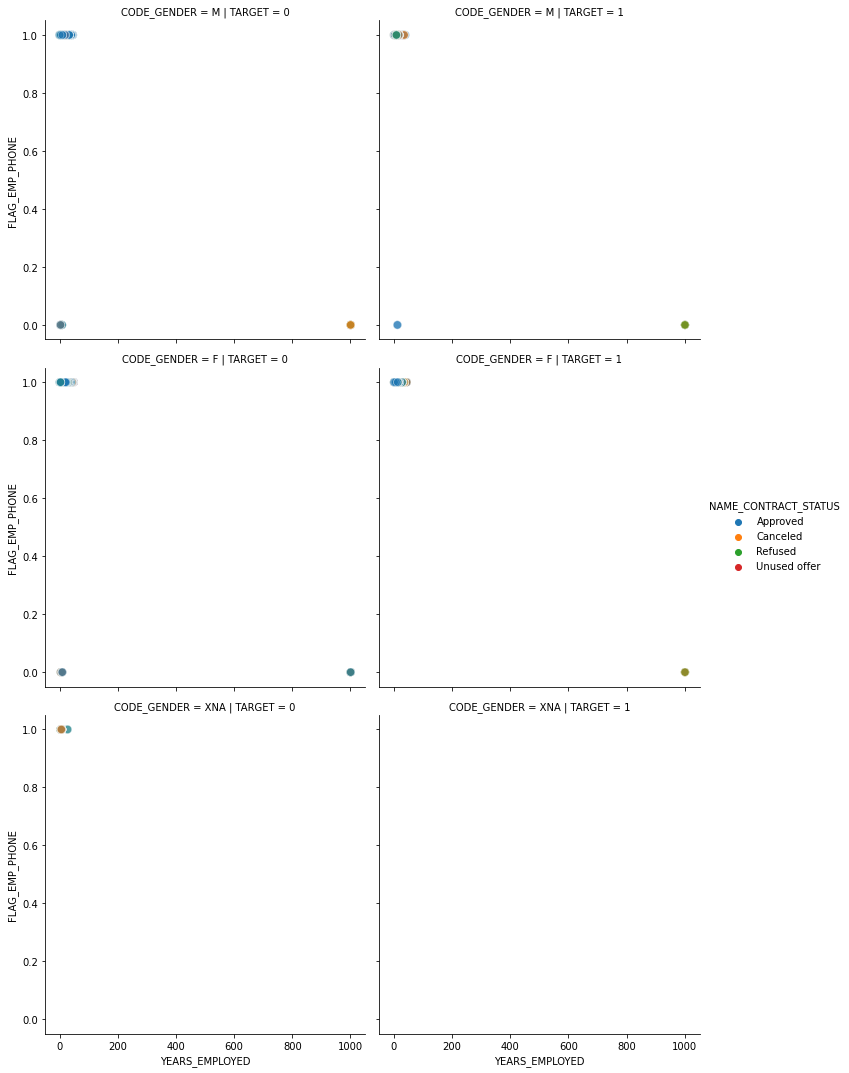


--------------------------------------------------------------------------------------------------------------
					r = 0.9985574749139777



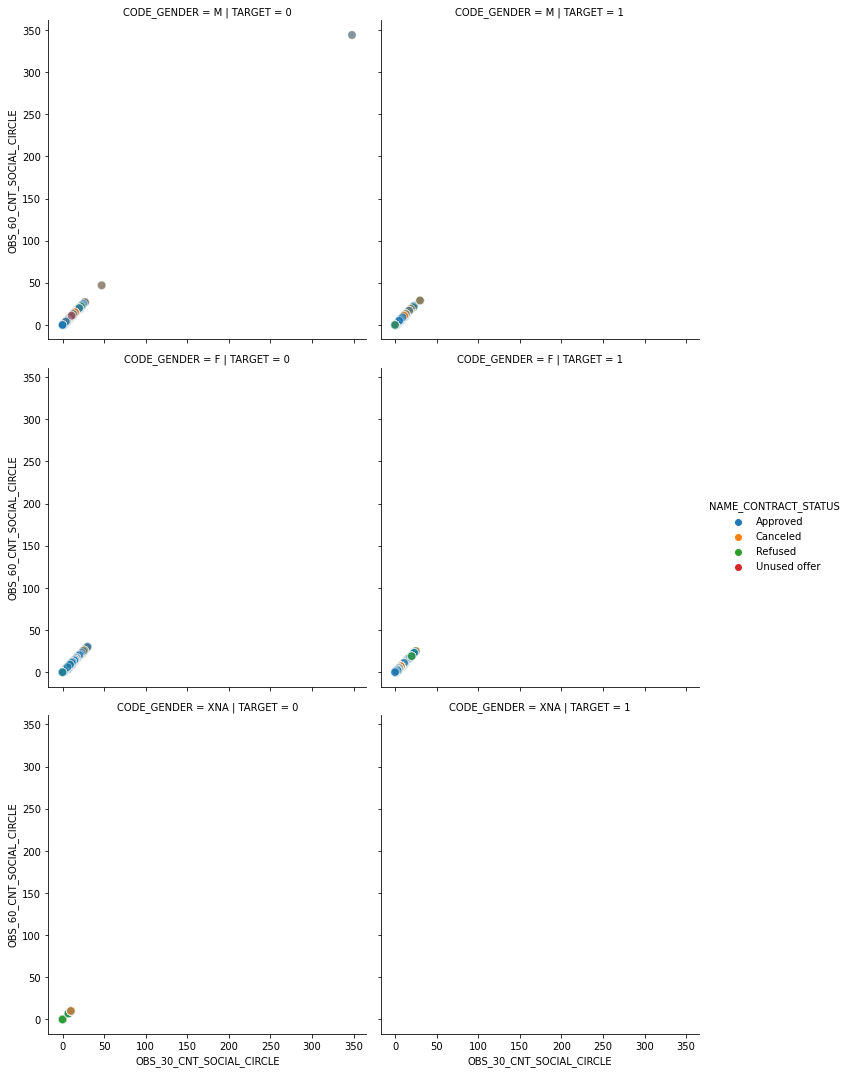


--------------------------------------------------------------------------------------------------------------
					r = 0.9860527885475177



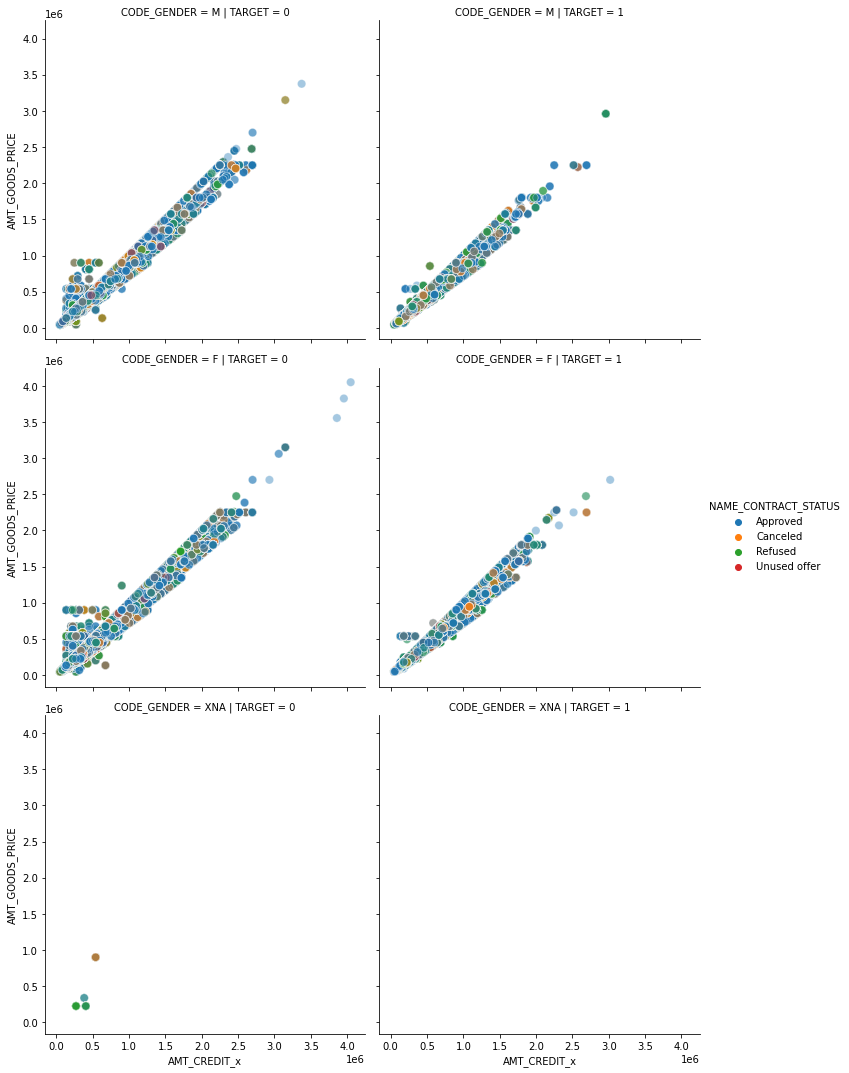


--------------------------------------------------------------------------------------------------------------
					r = 0.9756827519006934



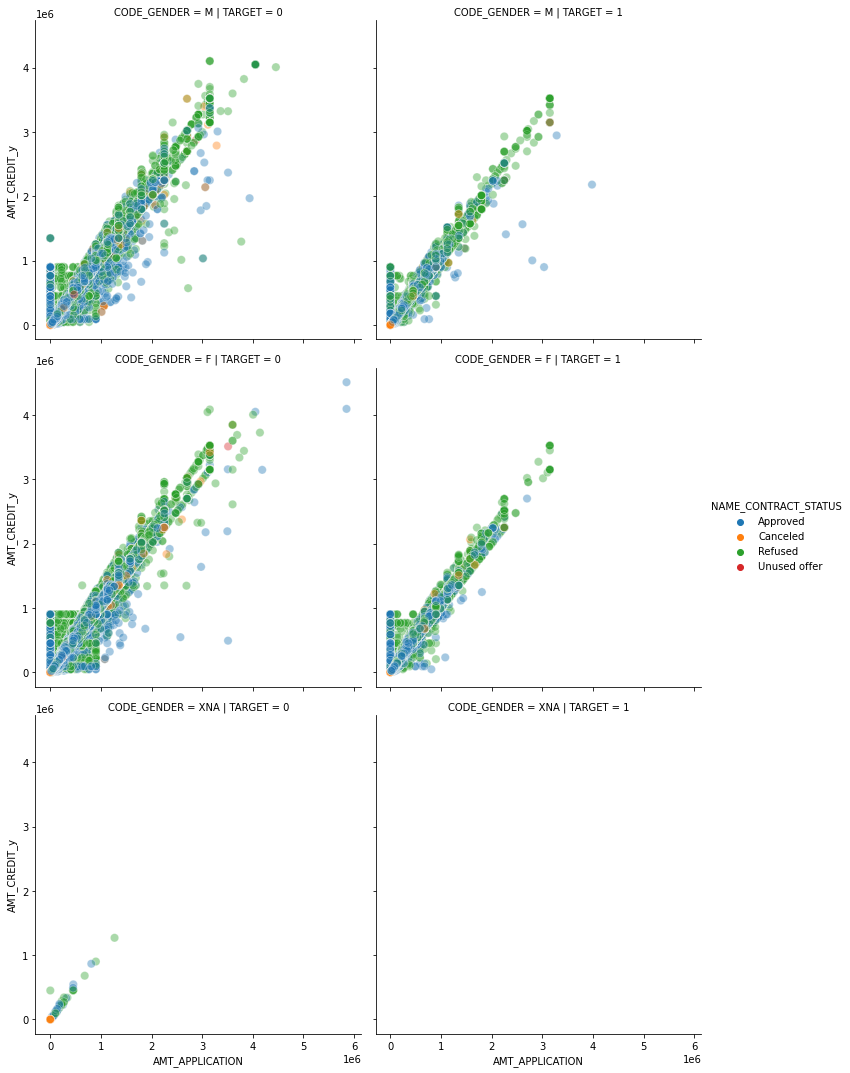


--------------------------------------------------------------------------------------------------------------
					r = 0.9458310614937971



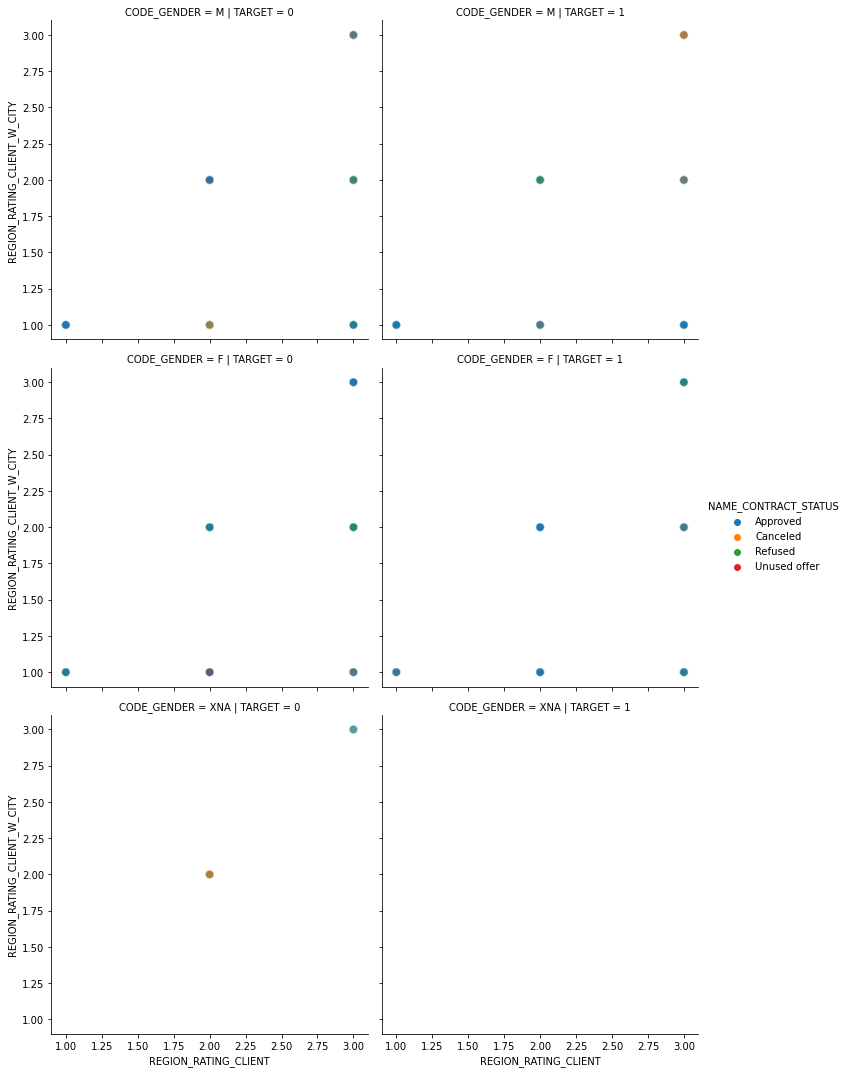


--------------------------------------------------------------------------------------------------------------
					r = 0.8789156395928408



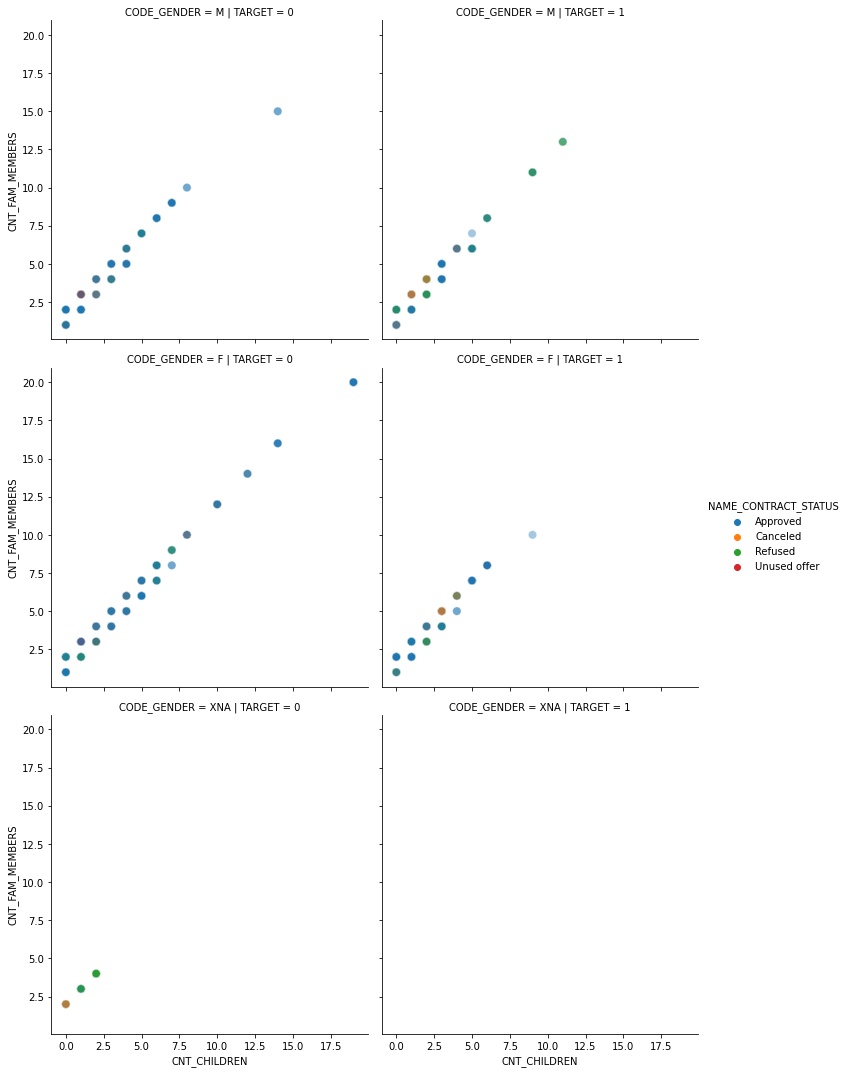


--------------------------------------------------------------------------------------------------------------
					r = 0.8739098422871344



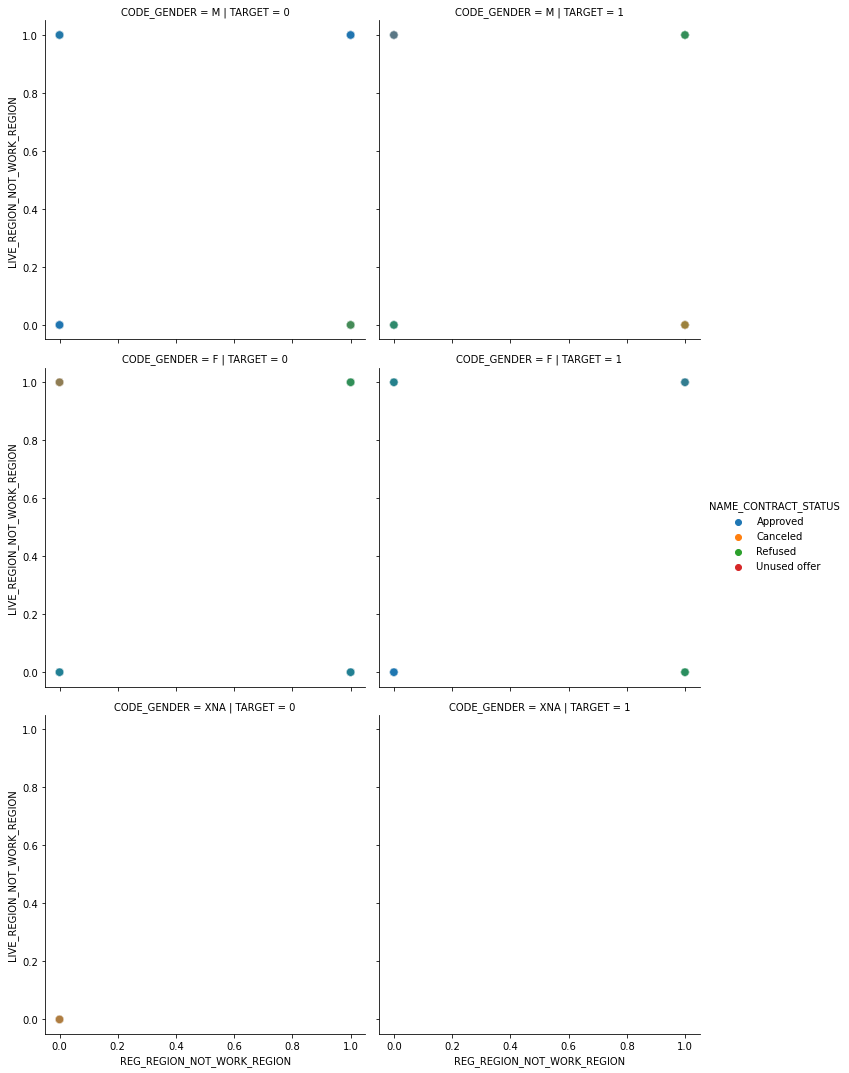


--------------------------------------------------------------------------------------------------------------
					r = 0.8625387285315264



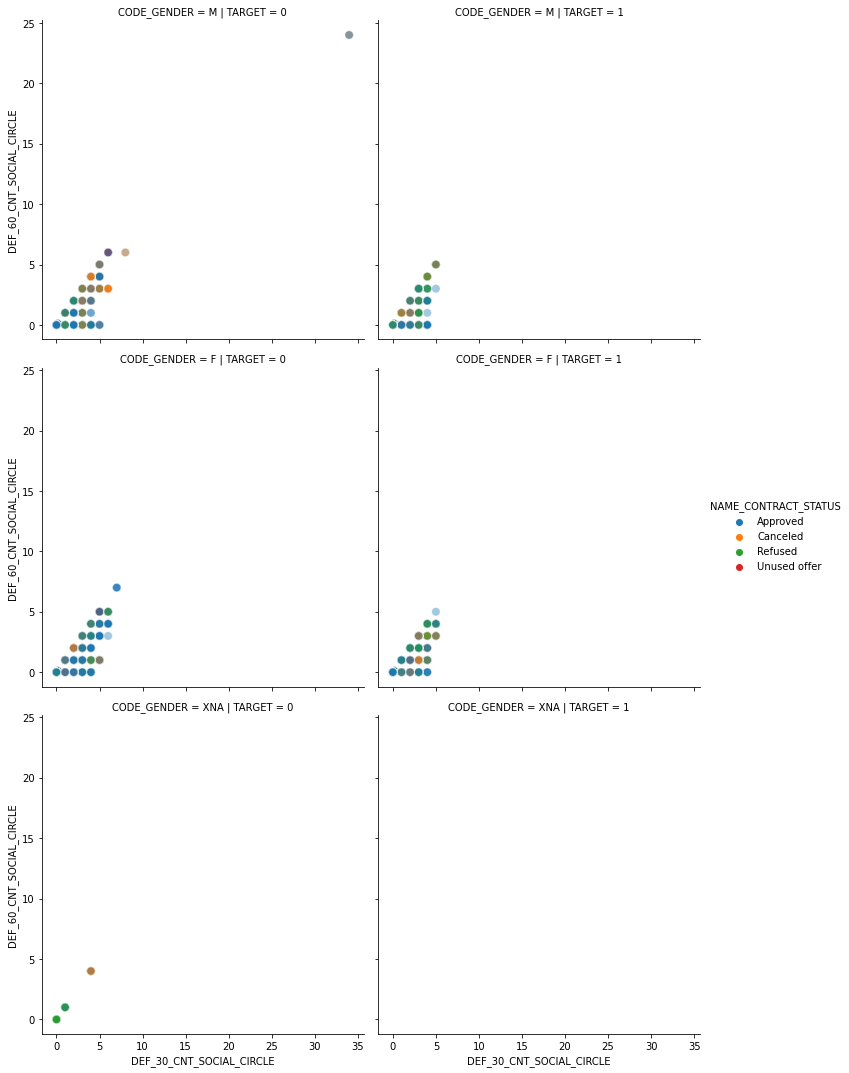


--------------------------------------------------------------------------------------------------------------
					r = 0.8310881993786998



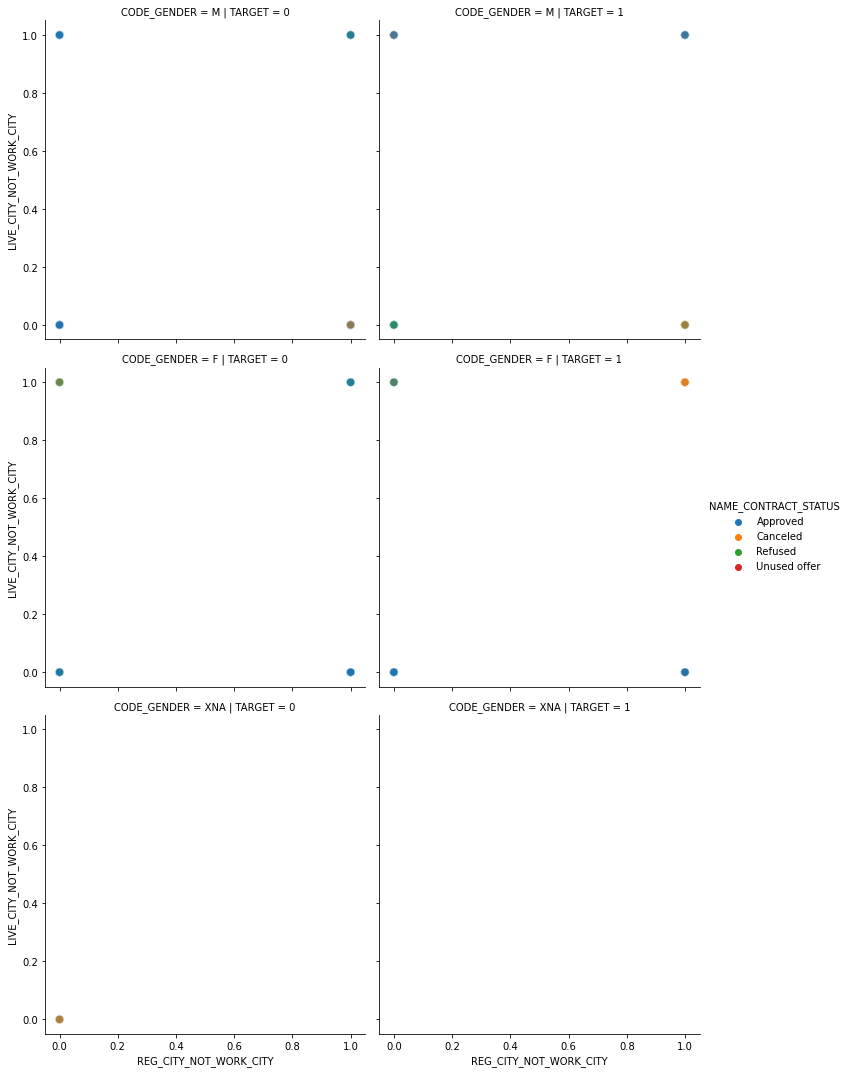


--------------------------------------------------------------------------------------------------------------
					r = 0.762996183413697



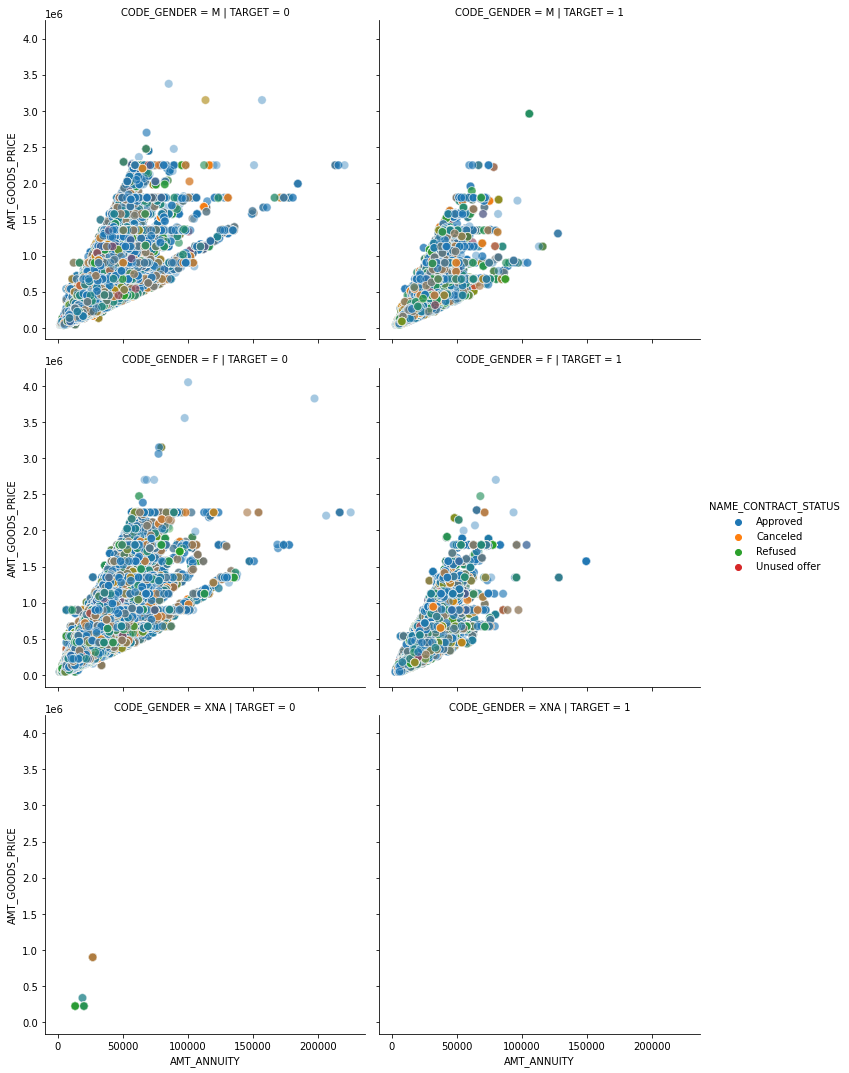


--------------------------------------------------------------------------------------------------------------


In [72]:
for x in range(len(df_NewLeftPrev)):
  sns.relplot(data=NewLeftPrev,x=df_NewLeftPrev.iloc[x]['level_0'],y=df_NewLeftPrev.iloc[x]['level_1'],row='CODE_GENDER',col='TARGET',hue='NAME_CONTRACT_STATUS',alpha=.4,marker='o',s=70)
  print(f"\t\t\t\t\tr = {df_NewLeftPrev.iloc[x][0]}\n")
  # plt.savefig(f'{x}.png',vmax='I', vmin='I', hmax='I', hmin='I',bbox_inches='tight',quality=100, optimize=True,progressive=True,pad_inches=.2)
  plt.show()
  # files.download(f'/content/{x}.png')
  print(f"\n{'-'*110}")